# First go over all the pages 

In [127]:
# This is for all pages minium information 

# Some test
import pandas as pd
import itertools 
from bs4 import BeautifulSoup
import requests
from requests import get
import time
from random import seed
from random import random
from random import randint
from ediblepickle import checkpoint
import os
import sys
sys.setrecursionlimit(100000)

# url = first_page = 'https://streeteasy.com/for-rent/nyc'


    # initialize a list called houses 
houses = []
    # initialize variable count at 1

    # initialize variable new_count at 0

## make sure to get proxies with low latency and high success rate, even if you have to cut down the number of proxies used
proxies_list = [['https://149.56.106.104:3128'],
               ['https://35.245.208.185:3128']]

user_agent = [
        ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246'],
        ['Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36'],
        ['Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36'],
        ['Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1'],
        ['Mozilla/5.0 (Linux; U; Android 4.2.3; he-il; NEO-X5-116A Build/JDQ39) AppleWebKit/534.30 (KHTML, like Gecko) Version/5.0 Safari/534.30'],
        ['Mozilla/5.0 (X11; U; Linux armv7l like Android; en-us) AppleWebKit/531.2+ (KHTML, like Gecko) Version/5.0 Safari/533.2+ Kindle/3.0+'],
        ['Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36'],
        ['Mozilla/5.0 (iPhone; CPU iPhone OS 12_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/69.0.3497.105 Mobile/15E148 Safari/605.1']
        ]
# only one value per element
SecFetchUser = ['?1','?T','?F']
SecFetchSite = ['cross-site','same-origin','same-site']
SecFetchMode = ['websocket','no-cors','same-origin','cors']

## more than one value per element
AcceptEncoding = [['gzip','identity'],['gzip','deflate','identity'],['br','deflate','gzip'],
                 ['identity','br','deflate'],['gzip','deflate']]




AcceptLanguage = [['nl-NL,nl;q=0.'+str(randint(1,9)),'en-USA,en;q=0.'+str(randint(1,9))],
                  ['fr-CH,fr;q=0.'+str(randint(1,9)),'nl-NL,nl;q=0.'+str(randint(1,9))],
                  ['nl-NL,nl;q=0.'+str(randint(1,9)),'de;q=0.'+str(randint(1,9))],
                  ['nl-NL,nl;q=0.'+str(randint(1,9)),'de-CH;q=0.'+str(randint(1,9))]]



cache_dir = 'cache_streeteasy_v1'
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)

@checkpoint(key=lambda args, kwargs: args[0].replace('/','_') + '.pkl', work_dir=cache_dir)
def scrape_website(url):
    # initialize a list called houses 
    houses = []


    ## random variables
    value_fetchuser = randint(0,2)
    value_site = randint(0,2)
    value_mode = randint(0,3)
    value_userag = randint(0,7)

    str_user = ','.join(user_agent[value_userag])

    accptenco = randint(0,3)
    str3 = ','.join(AcceptEncoding[accptenco])
    accplang = randint(0,3)
    str4 = ','.join(AcceptLanguage[accplang])

    proxies_rand = ''.join(proxies_list[randint(0,1)])

    headers = {
        'Connection': 'keep-alive',
        'Cache-Control': 'max-age=0',
        'DNT': '0',
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': str_user,
        'Sec-Fetch-User':SecFetchUser[value_fetchuser],
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.7,image/webp,image/apng,*/*;q=0.3,application/signed-exchange;v=b3',
        'Sec-Fetch-Dest':'none',
        'Sec-Fetch-Site': SecFetchSite[value_site],
        'Sec-Fetch-Mode': SecFetchMode[value_mode],
        'Accept-Encoding':str3,
        'Accept-Language': str4
    }

    # request the response
    response = get(url, headers=headers)

    # parse through the html 
    html_soup = BeautifulSoup(response.text, 'html.parser')
    # in the html of the page, find all the bins with <li> and class:
    #       house_data = html_soup.find_all('li', class_="search-list__item search-list__item--listing")
    house_data = html_soup.find_all('li', class_="searchCardList--listItem")
    # I like to print where the program is on the screen so we can follow its progress and where any errors happened
#    print(first_page)

    # if the response was not empty (if something was actually scraped)
    if house_data != []:
        # add to the list houses
        houses.extend(house_data)
        # random wait times
        value = randint(0,10)
        scaled_value = 15 + randint(-1,1)*randint(0,2)
        print(scaled_value)
        time.sleep(scaled_value)

    return houses



## Get all the primary information

In [128]:
# Need to do a loop over all the pages

houses = []

# First webpage 
first_page = 'https://streeteasy.com/for-rent/nyc'

house_temp = scrape_website(first_page)

houses.extend(house_temp)

page_root = 'https://streeteasy.com/for-rent/nyc?page='

count = 1
count_2 = 0
while count < 1129:
    url = page_root + str(count)
    print(url)
    house = scrape_website(url)
    houses.extend(house)
    count += 1
    count_2 += 1;   

https://streeteasy.com/for-rent/nyc?page=1
https://streeteasy.com/for-rent/nyc?page=2
https://streeteasy.com/for-rent/nyc?page=3
https://streeteasy.com/for-rent/nyc?page=4
https://streeteasy.com/for-rent/nyc?page=5
https://streeteasy.com/for-rent/nyc?page=6
https://streeteasy.com/for-rent/nyc?page=7
https://streeteasy.com/for-rent/nyc?page=8
https://streeteasy.com/for-rent/nyc?page=9
https://streeteasy.com/for-rent/nyc?page=10
https://streeteasy.com/for-rent/nyc?page=11
https://streeteasy.com/for-rent/nyc?page=12
https://streeteasy.com/for-rent/nyc?page=13
https://streeteasy.com/for-rent/nyc?page=14
https://streeteasy.com/for-rent/nyc?page=15
https://streeteasy.com/for-rent/nyc?page=16
https://streeteasy.com/for-rent/nyc?page=17
https://streeteasy.com/for-rent/nyc?page=18
https://streeteasy.com/for-rent/nyc?page=19
https://streeteasy.com/for-rent/nyc?page=20
https://streeteasy.com/for-rent/nyc?page=21
https://streeteasy.com/for-rent/nyc?page=22
https://streeteasy.com/for-rent/nyc?page=

https://streeteasy.com/for-rent/nyc?page=192
https://streeteasy.com/for-rent/nyc?page=193
https://streeteasy.com/for-rent/nyc?page=194
https://streeteasy.com/for-rent/nyc?page=195
https://streeteasy.com/for-rent/nyc?page=196
https://streeteasy.com/for-rent/nyc?page=197
https://streeteasy.com/for-rent/nyc?page=198
https://streeteasy.com/for-rent/nyc?page=199
https://streeteasy.com/for-rent/nyc?page=200
https://streeteasy.com/for-rent/nyc?page=201
https://streeteasy.com/for-rent/nyc?page=202
https://streeteasy.com/for-rent/nyc?page=203
https://streeteasy.com/for-rent/nyc?page=204
https://streeteasy.com/for-rent/nyc?page=205
https://streeteasy.com/for-rent/nyc?page=206
https://streeteasy.com/for-rent/nyc?page=207
https://streeteasy.com/for-rent/nyc?page=208
https://streeteasy.com/for-rent/nyc?page=209
https://streeteasy.com/for-rent/nyc?page=210
https://streeteasy.com/for-rent/nyc?page=211
https://streeteasy.com/for-rent/nyc?page=212
https://streeteasy.com/for-rent/nyc?page=213
https://st

https://streeteasy.com/for-rent/nyc?page=377
https://streeteasy.com/for-rent/nyc?page=378
https://streeteasy.com/for-rent/nyc?page=379
https://streeteasy.com/for-rent/nyc?page=380
https://streeteasy.com/for-rent/nyc?page=381
https://streeteasy.com/for-rent/nyc?page=382
https://streeteasy.com/for-rent/nyc?page=383
https://streeteasy.com/for-rent/nyc?page=384
https://streeteasy.com/for-rent/nyc?page=385
https://streeteasy.com/for-rent/nyc?page=386
https://streeteasy.com/for-rent/nyc?page=387
https://streeteasy.com/for-rent/nyc?page=388
https://streeteasy.com/for-rent/nyc?page=389
https://streeteasy.com/for-rent/nyc?page=390
https://streeteasy.com/for-rent/nyc?page=391
https://streeteasy.com/for-rent/nyc?page=392
https://streeteasy.com/for-rent/nyc?page=393
https://streeteasy.com/for-rent/nyc?page=394
https://streeteasy.com/for-rent/nyc?page=395
https://streeteasy.com/for-rent/nyc?page=396
https://streeteasy.com/for-rent/nyc?page=397
https://streeteasy.com/for-rent/nyc?page=398
https://st

https://streeteasy.com/for-rent/nyc?page=567
https://streeteasy.com/for-rent/nyc?page=568
https://streeteasy.com/for-rent/nyc?page=569
https://streeteasy.com/for-rent/nyc?page=570
https://streeteasy.com/for-rent/nyc?page=571
https://streeteasy.com/for-rent/nyc?page=572
https://streeteasy.com/for-rent/nyc?page=573
https://streeteasy.com/for-rent/nyc?page=574
https://streeteasy.com/for-rent/nyc?page=575
https://streeteasy.com/for-rent/nyc?page=576
https://streeteasy.com/for-rent/nyc?page=577
https://streeteasy.com/for-rent/nyc?page=578
https://streeteasy.com/for-rent/nyc?page=579
https://streeteasy.com/for-rent/nyc?page=580
https://streeteasy.com/for-rent/nyc?page=581
https://streeteasy.com/for-rent/nyc?page=582
https://streeteasy.com/for-rent/nyc?page=583
https://streeteasy.com/for-rent/nyc?page=584
https://streeteasy.com/for-rent/nyc?page=585
https://streeteasy.com/for-rent/nyc?page=586
https://streeteasy.com/for-rent/nyc?page=587
https://streeteasy.com/for-rent/nyc?page=588
https://st

https://streeteasy.com/for-rent/nyc?page=756
https://streeteasy.com/for-rent/nyc?page=757
https://streeteasy.com/for-rent/nyc?page=758
https://streeteasy.com/for-rent/nyc?page=759
https://streeteasy.com/for-rent/nyc?page=760
https://streeteasy.com/for-rent/nyc?page=761
https://streeteasy.com/for-rent/nyc?page=762
https://streeteasy.com/for-rent/nyc?page=763
https://streeteasy.com/for-rent/nyc?page=764
https://streeteasy.com/for-rent/nyc?page=765
https://streeteasy.com/for-rent/nyc?page=766
https://streeteasy.com/for-rent/nyc?page=767
https://streeteasy.com/for-rent/nyc?page=768
https://streeteasy.com/for-rent/nyc?page=769
https://streeteasy.com/for-rent/nyc?page=770
https://streeteasy.com/for-rent/nyc?page=771
https://streeteasy.com/for-rent/nyc?page=772
https://streeteasy.com/for-rent/nyc?page=773
https://streeteasy.com/for-rent/nyc?page=774
https://streeteasy.com/for-rent/nyc?page=775
https://streeteasy.com/for-rent/nyc?page=776
https://streeteasy.com/for-rent/nyc?page=777
https://st

https://streeteasy.com/for-rent/nyc?page=946
https://streeteasy.com/for-rent/nyc?page=947
https://streeteasy.com/for-rent/nyc?page=948
https://streeteasy.com/for-rent/nyc?page=949
https://streeteasy.com/for-rent/nyc?page=950
https://streeteasy.com/for-rent/nyc?page=951
https://streeteasy.com/for-rent/nyc?page=952
https://streeteasy.com/for-rent/nyc?page=953
https://streeteasy.com/for-rent/nyc?page=954
https://streeteasy.com/for-rent/nyc?page=955
https://streeteasy.com/for-rent/nyc?page=956
https://streeteasy.com/for-rent/nyc?page=957
https://streeteasy.com/for-rent/nyc?page=958
https://streeteasy.com/for-rent/nyc?page=959
https://streeteasy.com/for-rent/nyc?page=960
https://streeteasy.com/for-rent/nyc?page=961
https://streeteasy.com/for-rent/nyc?page=962
https://streeteasy.com/for-rent/nyc?page=963
https://streeteasy.com/for-rent/nyc?page=964
https://streeteasy.com/for-rent/nyc?page=965
https://streeteasy.com/for-rent/nyc?page=966
https://streeteasy.com/for-rent/nyc?page=967
https://st

https://streeteasy.com/for-rent/nyc?page=1126
https://streeteasy.com/for-rent/nyc?page=1127
https://streeteasy.com/for-rent/nyc?page=1128


## Get the url for each individual listing

In [129]:
# Getting some properties from the website with the count

import re

house_price = []
house_location = []
house_address = []
house_feature = []
house_url = []
house_bedroom = []
house_bathroom = []
house_area = []

# Here is the for loop
count = 4

for count in range(len(houses)):
    # Price of the house
    num = houses[count]
    price = num.find_all('span',{"class":"price listingCard-priceMargin"})[0].text
    price = price.replace(',','').replace('$','')
    house_price.append(price)
    df_price = pd.DataFrame({'house_price':house_price})

    # Location
    # Check if there is a new building level
    temp = num.find_all('p',{"class":"listingCardLabel listingCardLabel-grey listingCard-upperShortLabel"})
    if len(temp) == 1:
        location = num.find_all('p',{"class":"listingCardLabel listingCardLabel-grey listingCard-upperShortLabel"})[0].text
    else:
        location = num.find_all('p',{"class":"listingCardLabel listingCardLabel-grey listingCard-upperShortLabel"})[1].text
    match_location = re.findall(r'(?<=in ).*', location.strip())
    house_location.append(str(match_location))
    df_location = pd.DataFrame({'location':house_location})
    
    # Address and url for the appartment
    if num.find_all('a',{"class":"listingCard-link jsCardLinkGA featured-link-to-hdp"}):
        address = num.find_all('a',{"class":"listingCard-link jsCardLinkGA featured-link-to-hdp"})[0].text
        url = num.find_all('a',{"class":"listingCard-link jsCardLinkGA featured-link-to-hdp"})[0]
        url = url.get('href')
    else:
        address = num.find_all('a',{"class":"listingCard-link jsCardLinkGA"})[0].text
        url = num.find_all('a',{"class":"listingCard-link jsCardLinkGA"})[0]
        url = url.get('href')
    house_address.append(address)
    df_address = pd.DataFrame({'address':house_address})
    house_url.append(url)
    df_url = pd.DataFrame({'url':house_url})
    
    
    # Number of bedrooms
    bedrooms = num.find_all('span',{"listingDetailDefinitionsText"})[0].text
    if bedrooms.strip() == 'Studio':
        house_bedroom.append(0)
    else:      
        house_bedroom.append(int(bedrooms.strip()[0]))
    df_bedrooms = pd.DataFrame({'bedroom':house_bedroom})
    
    
    # Number of bathroom    
    try:
        bath = num.find_all('span',{"class":"listingDetailDefinitionsText"})[1].text
        house_bathroom.append(int(bath.strip()[0]))
    except:
        house_bathroom.append(1)
        
    df_bathroom = pd.DataFrame({'bathroom':house_bathroom})
    
    # Surface area in sqf
    area = num.find_all('span',{"class":"listingDetailDefinitionsText"});
    if len(area)==3:
        try:
            house_area.append(int(area[2].get_text().strip().replace('\n','').split()[0]))
        except:
            house_area.append(int(area[2].get_text().strip().replace('\n','').split()[0].strip().replace(',','')))
    else:
        house_area.append(None)
    df_area = pd.DataFrame({'area':house_area})
    
    
#     <span class="listingDetailDefinitionsText">1 Bath</span>
    
#     <span class="listingDetailDefinitionsText">1 Bath</span>
    
    # # Here is the adress 
    # <address class="listingCard-addressLabel listingCard-upperShortLabel">
    #         <a class="listingCard-link jsCardLinkGA featured-link-to-hdp" tabindex="-1" href="https://streeteasy.com/building/31_36-32-street-astoria/4a?featured=1" data-featured-event-category="rentals_search" data-featured-event-label="listing_id=3873282|slot=1">31-36 32nd Street #4A</a>
    #       </address>

    # # Here is the neig
    # <p class="listingCardLabel listingCardLabel-grey listingCard-upperShortLabel">
    #         Rental Unit in Astoria
    #       </p>
    
#     <span class="listingDetailDefinitionsText">2 Beds</span>

result = pd.concat([df_price, df_location], axis=1, sort=False)
result1 = pd.concat([result, df_address], axis=1, sort=False)
result2 = pd.concat([result1, df_url], axis=1, sort=False)
result3 = pd.concat([result2,df_bedrooms], axis=1, sort=False)
result4 = pd.concat([result3,df_bathroom], axis=1, sort=False)
result5 = pd.concat([result4,df_area], axis=1, sort=False)

#dfa = pd.concat([result3, df_surface], axis=1, sort=False)
result5.head()

,house_price,location,address,url,bedroom,bathroom,area
0,4874,['Stuyvesant Town/PCV'],321 Avenue C #8H,https://streeteasy.com/building/315-avenue-c-n...,1,1,764.0
1,3300,['Sutton Place'],344 East 55th Street #2C,https://streeteasy.com/building/344-east-55-st...,1,1,NaN
2,2600,['Jersey City'],19 Cypress Street GROUND-F,https://streeteasy.com/building/19-cypress-str...,2,2,NaN
3,5195,['Murray Hill'],401 East 34th Street #N21G,https://streeteasy.com/building/view-34/n21g,1,1,636.0
4,3647,['Hunters Point'],28-10 Jackson Avenue #21K,https://streeteasy.com/building/28_10-jackson-...,1,1,NaN


### With the previous info, get all individuals url

In [130]:
# This is for houses individually 

# Some test
import pandas as pd
import itertools 
from bs4 import BeautifulSoup
import requests
from requests import get
import time
from random import seed
from random import random
from random import randint
from ediblepickle import checkpoint
import os
import sys
sys.setrecursionlimit(100000)

# url = first_page = 'https://streeteasy.com/for-rent/nyc'


    # initialize a list called houses 
houses = []
    # initialize variable count at 1

    # initialize variable new_count at 0

## make sure to get proxies with low latency and high success rate, even if you have to cut down the number of proxies used
proxies_list = [['https://149.56.106.104:3128'],
               ['https://35.245.208.185:3128']]

user_agent = [
        ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246'],
        ['Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36'],
        ['Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36'],
        ['Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1'],
        ['Mozilla/5.0 (Linux; U; Android 4.2.3; he-il; NEO-X5-116A Build/JDQ39) AppleWebKit/534.30 (KHTML, like Gecko) Version/5.0 Safari/534.30'],
        ['Mozilla/5.0 (X11; U; Linux armv7l like Android; en-us) AppleWebKit/531.2+ (KHTML, like Gecko) Version/5.0 Safari/533.2+ Kindle/3.0+'],
        ['Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36'],
        ['Mozilla/5.0 (iPhone; CPU iPhone OS 12_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/69.0.3497.105 Mobile/15E148 Safari/605.1']
        ]
# only one value per element
SecFetchUser = ['?1','?T','?F']
SecFetchSite = ['cross-site','same-origin','same-site']
SecFetchMode = ['websocket','no-cors','same-origin','cors']

## more than one value per element
AcceptEncoding = [['gzip','identity'],['gzip','deflate','identity'],['br','deflate','gzip'],
                 ['identity','br','deflate'],['gzip','deflate']]




AcceptLanguage = [['nl-NL,nl;q=0.'+str(randint(1,9)),'en-USA,en;q=0.'+str(randint(1,9))],
                  ['fr-CH,fr;q=0.'+str(randint(1,9)),'nl-NL,nl;q=0.'+str(randint(1,9))],
                  ['nl-NL,nl;q=0.'+str(randint(1,9)),'de;q=0.'+str(randint(1,9))],
                  ['nl-NL,nl;q=0.'+str(randint(1,9)),'de-CH;q=0.'+str(randint(1,9))]]



cache_dir = 'cache_streeteasy_House_individual'
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)

@checkpoint(key=lambda args, kwargs: args[0].replace('/','_') + '.pkl', work_dir=cache_dir)
def scrape_website_individual_houses(url):
    # initialize a list called houses 
    houses = []


    ## random variables
    value_fetchuser = randint(0,2)
    value_site = randint(0,2)
    value_mode = randint(0,3)
    value_userag = randint(0,7)

    str_user = ','.join(user_agent[value_userag])

    accptenco = randint(0,3)
    str3 = ','.join(AcceptEncoding[accptenco])
    accplang = randint(0,3)
    str4 = ','.join(AcceptLanguage[accplang])

    proxies_rand = ''.join(proxies_list[randint(0,1)])

    headers = {
        'Connection': 'keep-alive',
        'Cache-Control': 'max-age=0',
        'DNT': '0',
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': str_user,
        'Sec-Fetch-User':SecFetchUser[value_fetchuser],
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.7,image/webp,image/apng,*/*;q=0.3,application/signed-exchange;v=b3',
        'Sec-Fetch-Dest':'none',
        'Sec-Fetch-Site': SecFetchSite[value_site],
        'Sec-Fetch-Mode': SecFetchMode[value_mode],
        'Accept-Encoding':str3,
        'Accept-Language': str4
    }

    # request the response
    response = get(url, headers=headers)

    # parse through the html 
    html_soup = BeautifulSoup(response.text, 'html.parser')
    # in the html of the page, find all the bins with <li> and class:
    #       house_data = html_soup.find_all('li', class_="search-list__item search-list__item--listing")
#     house_data = html_soup.find_all('li', class_="searchCardList--listItem")
#     # I like to print where the program is on the screen so we can follow its progress and where any errors happened
# #    print(first_page)

#     # if the response was not empty (if something was actually scraped)
#     if house_data != []:
#         # add to the list houses
#         houses.extend(house_data)
#         # random wait times
    value = randint(0,10)
    scaled_value = 15 + randint(-1,1)*randint(0,2)
    print(scaled_value)
    time.sleep(scaled_value)

    return html_soup

In [37]:
count_2 = 0
houses = []
url_all = []
for i in range(1,9830):
    try:
        url = result5.url[i]
        print(url)
        house = scrape_website_individual_houses(url)
        houses.append(house)
        url_all.append(url)
        print(i)
    except:
        pass
        

https://streeteasy.com/building/344-east-55-street-new_york/2c?featured=1
1
https://streeteasy.com/building/19-cypress-street-jersey_city/ground-f
2
https://streeteasy.com/building/view-34/n21g
3
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
4
https://streeteasy.com/building/hollingsworth-70-west-37th-street-new_york/1220
5
https://streeteasy.com/building/the-sagamore/016e
6
https://streeteasy.com/building/443-west-151-street-new_york/rental/3905005
7
https://streeteasy.com/building/portside-towers/1411
8
https://streeteasy.com/building/portside-towers/1210
9
https://streeteasy.com/building/568-communipaw-avenue-jersey_city/305
10
https://streeteasy.com/building/135-cambridge-avenue-jersey_city/2
11
https://streeteasy.com/building/19-cypress-street-jersey_city/ground-floor
12
https://streeteasy.com/building/390-south-2-street-brooklyn/5c
13
https://streeteasy.com/building/95-wall-street-new_york/618?featured=1
14
https://streeteasy.com/building/clar

133
https://streeteasy.com/building/65-roebling-street-brooklyn/108
134
https://streeteasy.com/building/64_46-223-place-oakland_gardens/a
135
https://streeteasy.com/building/river-place/2102
136
https://streeteasy.com/building/river-place/3311
137
https://streeteasy.com/building/silver-towers/n17m
138
https://streeteasy.com/building/silver-towers/s60c
139
https://streeteasy.com/building/the-plaza-condominium-residences/rental/3752958?featured=1
140
https://streeteasy.com/building/sven-29_59-northern-boulevard-long_island_city/php?featured=1
141
https://streeteasy.com/building/170-174-east-2nd-street/5a
142
https://streeteasy.com/building/30_59-crescent-street-astoria/2f
143
https://streeteasy.com/building/sven-29_59-northern-boulevard-long_island_city/42m?infeed=1
144
https://streeteasy.com/building/336-east-90-street-new_york/5c
145
https://streeteasy.com/building/943-metropolitan-avenue-brooklyn/3l
146
https://streeteasy.com/building/120-armstrong-avenue-jersey_city/rental/3904762
14

262
https://streeteasy.com/building/113-west-71-street-new_york/9b
263
https://streeteasy.com/building/eagle-west/20921
264
https://streeteasy.com/building/137-bayard-street-brooklyn/4e
265
https://streeteasy.com/building/anagram-nomad/47c?featured=1
266
https://streeteasy.com/building/97_45-63-drive-rego_park/6j?featured=1
267
https://streeteasy.com/building/55-clinton-street-new_york/16
268
https://streeteasy.com/building/360-east-50-street-new_york/3g
269
https://streeteasy.com/building/summit-222-east-44th-street-new_york/33k?infeed=1
270
https://streeteasy.com/building/saint-ann-court/2i
271
https://streeteasy.com/building/parc-77/04e
272
https://streeteasy.com/building/317-west-74-street-new_york/5d
273
https://streeteasy.com/building/30-danforth-avenue-jersey_city/2nd-floor
274
https://streeteasy.com/building/avora-condominium/811
275
https://streeteasy.com/building/201-east-89-street/2c
276
https://streeteasy.com/building/1286-1-avenue-new_york/2a
277
https://streeteasy.com/bui

395
https://streeteasy.com/building/555ten-555-10th-avenue-manhattan/54b?infeed=1
396
https://streeteasy.com/building/319-east-78-street-new_york/1a
397
https://streeteasy.com/building/436-west-broadway-new_york/5r
398
https://streeteasy.com/building/855-de-kalb-avenue-brooklyn/2a
399
https://streeteasy.com/building/1875-atlantic-avenue-brooklyn/7d
400
https://streeteasy.com/building/181-avenue-c-new_york/1
401
https://streeteasy.com/building/88-linden-boulevard-brooklyn/4e
402
https://streeteasy.com/building/59_24-41-avenue-woodside/1b
403
https://streeteasy.com/building/953-amsterdam-avenue-new_york/5b
404
https://streeteasy.com/building/2916-snyder-avenue-brooklyn/2
405
https://streeteasy.com/building/the-tate/sph3b?featured=1
406
https://streeteasy.com/building/63-wall-street-new_york/706?featured=1
407
https://streeteasy.com/building/31_72-35-street-astoria/2f
408
https://streeteasy.com/building/443-east-78-street-new_york/4f
409
https://streeteasy.com/building/276-twentieth/th3?i

519
https://streeteasy.com/building/953-amsterdam-avenue-new_york/5b
520
https://streeteasy.com/building/2916-snyder-avenue-brooklyn/2
521
https://streeteasy.com/building/summit-222-east-44th-street-new_york/32f?infeed=1
522
https://streeteasy.com/building/31_72-35-street-astoria/2f
523
https://streeteasy.com/building/443-east-78-street-new_york/4f
524
https://streeteasy.com/building/30_17-49-street-astoria/2s
525
https://streeteasy.com/building/959-metropolitan-avenue-brooklyn/1r
526
https://streeteasy.com/building/645-west-59th-street-lincoln_square/805
527
https://streeteasy.com/building/1068-fulton-street-brooklyn/8d
528
https://streeteasy.com/building/411-meeker-avenue-brooklyn/6c
529
https://streeteasy.com/building/319-east-78-street-new_york/3b
530
https://streeteasy.com/building/31-west-17-street-new_york/5
531
https://streeteasy.com/building/100-ainslie-street-brooklyn/5c?featured=1
532
https://streeteasy.com/building/the-westmont/03n?featured=1
533
https://streeteasy.com/buil

644
https://streeteasy.com/building/ellipse-at-newport/208?featured=1
645
https://streeteasy.com/building/longacre-house/17c
646
https://streeteasy.com/building/parc-77/05a
647
https://streeteasy.com/building/555ten-555-10th-avenue-manhattan/51d?infeed=1
648
https://streeteasy.com/building/600-washington/408
649
https://streeteasy.com/building/214-edgecombe-avenue-new_york/1
650
https://streeteasy.com/building/25_05-23-street-astoria/1
651
https://streeteasy.com/building/186-nassau-street-brooklyn/323
652
https://streeteasy.com/building/356-4-street-brooklyn/b
653
https://streeteasy.com/building/64-bayard-street-brooklyn/4j
654
https://streeteasy.com/rental/3904371
655
https://streeteasy.com/rental/3904372
656
https://streeteasy.com/building/35-west-47-street-bayonne/1
657
https://streeteasy.com/building/100-maiden-lane-new_york/1701?featured=1
658
https://streeteasy.com/building/365-bond/a803?featured=1
659
https://streeteasy.com/building/16-bennett-street-jersey_city/512
660
https://

768
https://streeteasy.com/building/336-bleecker-street-brooklyn/2f
769
https://streeteasy.com/building/442-east-20-street-new_york/03g?featured=1
770
https://streeteasy.com/building/via-57-west/1121?featured=1
771
https://streeteasy.com/building/284-east-10-street-new_york/4e
772
https://streeteasy.com/building/510-east-12-street-new_york/3
773
https://streeteasy.com/building/sven-29_59-northern-boulevard-long_island_city/42m?infeed=1
774
https://streeteasy.com/building/7-carmine-street-new_york/14
775
https://streeteasy.com/building/lantern-house/rental/3904260
776
https://streeteasy.com/building/75-ralph-avenue-brooklyn/5a
777
https://streeteasy.com/building/109-ludlow-street-new_york/25
778
https://streeteasy.com/building/315-west-54-street-new_york/rental/3904257
779
https://streeteasy.com/building/70-west-109-street-new_york/34
780
https://streeteasy.com/building/114-3-avenue-new_york/2
781
https://streeteasy.com/building/47_05-center-blvd-long_island_city/2011
782
https://street

891
https://streeteasy.com/building/83-wyckoff-avenue-brooklyn/1b
892
https://streeteasy.com/building/1675-flatbush-avenue-brooklyn/3r
893
https://streeteasy.com/building/300-west-106-street-new_york/38
894
https://streeteasy.com/building/200-chambers-street-new_york/4r
895
https://streeteasy.com/building/37-wall-street-new_york/5t?featured=1
896
https://streeteasy.com/building/the-stanwix/2191?featured=1
897
https://streeteasy.com/building/329-west-14-street-new_york/3b
898
https://streeteasy.com/building/375-south-3-street-brooklyn/1r
899
https://streeteasy.com/building/276-twentieth/th01?infeed=1
900
https://streeteasy.com/building/halo-lic/1508
901
https://streeteasy.com/building/1681-dean-street-brooklyn/2f
902
https://streeteasy.com/building/276-grand-concourse-bronx/7002
903
https://streeteasy.com/building/227-winthrop-street-brooklyn/4l
904
https://streeteasy.com/building/200-linden-boulevard-brooklyn/5b
905
https://streeteasy.com/building/22_42-43-street-astoria/1a
906
https:/

1019
https://streeteasy.com/building/659-1-street-hoboken/209
1020
https://streeteasy.com/building/109-erie-street-jersey_city/4l
1021
https://streeteasy.com/building/the-biltmore/38d?featured=1
1022
https://streeteasy.com/building/gotham-west/622?featured=1
1023
https://streeteasy.com/building/2-radio-avenue-secaucus/a20
1024
https://streeteasy.com/building/245-8-street-jersey_city/402
1025
https://streeteasy.com/building/the-epic/49b?infeed=1
1026
https://streeteasy.com/building/241-lafayette-street-new_york/4
1027
https://streeteasy.com/building/66-west-109-street-new_york/1a
1028
https://streeteasy.com/building/1259-lincoln-place-brooklyn/1c
1029
https://streeteasy.com/building/1418-putnam-avenue-brooklyn/3l
1030
https://streeteasy.com/building/329-broadway-brooklyn/1203
1031
https://streeteasy.com/building/329-broadway-brooklyn/rental/3903999
1032
https://streeteasy.com/building/329-broadway-brooklyn/902
1033
https://streeteasy.com/building/2814-newkirk-avenue-brooklyn/c5
1034
htt

1145
https://streeteasy.com/rental/3903877
1146
https://streeteasy.com/building/65-2-street-jersey_city/1404
1147
https://streeteasy.com/building/the-lucida/15h?featured=1
1148
https://streeteasy.com/building/475-clermont/1010?featured=1
1149
https://streeteasy.com/building/536-grand-street-hoboken/605
1150
https://streeteasy.com/rental/3903875
1151
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
1152
https://streeteasy.com/building/645-bergen-avenue-jersey_city/28
1153
https://streeteasy.com/building/106-glenwood-avenue-jersey_city/203
1154
https://streeteasy.com/building/100-lincoln-street-jersey_city/2a
1155
https://streeteasy.com/building/704-grand-street-hoboken/2n
1156
https://streeteasy.com/building/403-avenue-c-bayonne/0
1157
https://streeteasy.com/building/321-adolphus-avenue-cliffside_park/603
1158
https://streeteasy.com/building/72-arlington-avenue-jersey_city/2r
1159
https://streeteasy.com/building/145-pamrapo-avenue-jersey_city/1
1160
htt

1270
https://streeteasy.com/building/132-vermont-street-brooklyn/2f
1271
https://streeteasy.com/building/18-st-marks-place-new_york/6
1272
https://streeteasy.com/building/5241-center-boulevard-long_island_city/3909
1273
https://streeteasy.com/building/535w43-535-west-43-street-new_york/s11g?featured=1
1274
https://streeteasy.com/building/106-west-13-street-new_york/12a?featured=1
1275
https://streeteasy.com/building/5241-center-boulevard-long_island_city/3605
1276
https://streeteasy.com/building/5241-center-boulevard-long_island_city/1410
1277
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
1278
https://streeteasy.com/building/5241-center-boulevard-long_island_city/807
1279
https://streeteasy.com/building/250n10-250-north-10-street-brooklyn/340
1280
https://streeteasy.com/building/the-max/830
1281
https://streeteasy.com/building/the-max/820
1282
https://streeteasy.com/building/33-bond-street-brooklyn/2403
1283
https://streeteasy.com/building/4610-cent

1394
https://streeteasy.com/building/tribeca-pointe/2605
1395
https://streeteasy.com/building/420-kent-avenue-brooklyn/547
1396
https://streeteasy.com/building/henry-hall/25g
1397
https://streeteasy.com/building/henry-hall/10l
1398
https://streeteasy.com/building/99-cornelia-street-brooklyn/1l
1399
https://streeteasy.com/building/685-first-avenue-manhattan/8h?featured=1
1400
https://streeteasy.com/building/60-water-street/1000?featured=1
1401
https://streeteasy.com/building/35-east-35-street-new_york/phf
1402
https://streeteasy.com/building/324-east-8-street-new_york/2a
1403
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
1404
https://streeteasy.com/building/591-ocean-parkway-brooklyn/8b
1405
https://streeteasy.com/building/244-hoyt-street-brooklyn/3r
1406
https://streeteasy.com/building/214-east-51-street-new_york/3l
1407
https://streeteasy.com/building/303-bay-17-street-brooklyn/a13
1408
https://streeteasy.com/building/718-west-171-street-new_york/1

1515
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
1516
https://streeteasy.com/building/rutherford-place/rental/3903467
1517
https://streeteasy.com/building/29-mac-dougal-street-brooklyn/1
1518
https://streeteasy.com/building/206-east-20-street-new_york/ph1
1519
https://streeteasy.com/building/susans-court/6ca
1520
https://streeteasy.com/building/1261-pacific-street-brooklyn/4r
1521
https://streeteasy.com/building/the-driggs/6g
1522
https://streeteasy.com/building/68-gold-street--brooklyn/5a
1523
https://streeteasy.com/building/149_15-22-avenue-whitestone/3
1524
https://streeteasy.com/building/101-west-end-avenue-new_york/7s
1525
https://streeteasy.com/building/eagle-lofts/712?featured=1
1526
https://streeteasy.com/building/the-henry/ph4?featured=1
1527
https://streeteasy.com/building/101-west-end-avenue-new_york/7s
1528
https://streeteasy.com/building/21-west-end-avenue-new_york/2117
1529
https://streeteasy.com/building/28_10-jackson-avenue-long_is

1642
https://streeteasy.com/building/the-arches-nyc/2204
1643
https://streeteasy.com/building/239-kingston-avenue-brooklyn/3
1644
https://streeteasy.com/building/the-gilroy/28aa
1645
https://streeteasy.com/building/11-west-70-street-new_york/1r
1646
https://streeteasy.com/building/156-cornelia-street-brooklyn/rental/3903317
1647
https://streeteasy.com/building/142-duane-street-new_york/ph1
1648
https://streeteasy.com/building/the-strand/7c
1649
https://streeteasy.com/building/106-8-avenue-new_york/rental/3903314
1650
https://streeteasy.com/building/81-orchard-street-new_york/30
1651
https://streeteasy.com/building/prism-at-park-ave-south/21h?featured=1
1652
https://streeteasy.com/building/the-heritage/rental/3873747?featured=1
1653
https://streeteasy.com/building/81-orchard-street-new_york/30
1654
https://streeteasy.com/building/9602-4-avenue-brooklyn/2
1655
https://streeteasy.com/building/the-artisan/2014?infeed=1
1656
https://streeteasy.com/building/89-christopher-street-new_york/20


1765
https://streeteasy.com/building/182_35-wexford-terrace-jamaica/4e
1766
https://streeteasy.com/building/321-east-25-street-new_york/3a
1767
https://streeteasy.com/building/675-west-59th-street-lincoln_square/705?infeed=1
1768
https://streeteasy.com/building/15-william-street-new_york/21f
1769
https://streeteasy.com/building/234-east-106-street-new_york/5a
1770
https://streeteasy.com/building/207-de-kalb-avenue-brooklyn/1
1771
https://streeteasy.com/building/373-tompkins-avenue-brooklyn/ph
1772
https://streeteasy.com/building/128-2-avenue-new_york/aa
1773
https://streeteasy.com/building/205-10-avenue-new_york/2s
1774
https://streeteasy.com/building/herald-towers/04c10
1775
https://streeteasy.com/building/271-martense-street-brooklyn/1f
1776
https://streeteasy.com/building/1274-1-avenue-new_york/12
1777
https://streeteasy.com/building/90w-90-washington-street-new_york/4n?featured=1
1778
https://streeteasy.com/building/the-cammeyer/4d?featured=1
1779
https://streeteasy.com/building/th

1892
https://streeteasy.com/building/50-murray-street-new_york/624
1893
https://streeteasy.com/building/675-west-59th-street-lincoln_square/2604?infeed=1
1894
https://streeteasy.com/building/50-murray-street-new_york/617
1895
https://streeteasy.com/building/50-murray-street-new_york/1719
1896
https://streeteasy.com/building/50-murray-street-new_york/rental/3903074
1897
https://streeteasy.com/building/5-east-124-street-new_york/4
1898
https://streeteasy.com/building/the-driggs/5b
1899
https://streeteasy.com/building/103_19-68-road-forest_hills/x
1900
https://streeteasy.com/building/535-broadway-new_york/3f
1901
https://streeteasy.com/building/114-east-40-street-new_york/1d
1902
https://streeteasy.com/building/442-decatur-street-brooklyn/7a
1903
https://streeteasy.com/building/805-columbus-avenue-new_york/phd?featured=1
1904
https://streeteasy.com/building/136-boerum-street-brooklyn/b2?featured=1
1905
https://streeteasy.com/building/48-spring-street-new_york/3dd
1906
https://streeteasy.c

2015
https://streeteasy.com/building/1080-greene-avenue-brooklyn/2?featured=1
2016
https://streeteasy.com/building/manhattan-park-10_40-river-road-new_york/03006f?featured=1
2017
https://streeteasy.com/building/218-20-street-brooklyn/2
2018
https://streeteasy.com/building/720-liberty-avenue-brooklyn/2w
2019
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
2020
https://streeteasy.com/building/775-columbus-avenue-new_york/7d
2021
https://streeteasy.com/building/808-columbus-avenue-new_york/6h
2022
https://streeteasy.com/building/w-downtown-hotel-residences/rental/3902932
2023
https://streeteasy.com/building/232-east-40-street-new_york/3b
2024
https://streeteasy.com/building/595-kosciuszko-street-brooklyn/4
2025
https://streeteasy.com/building/3050-fairfield-avenue-bronx/6e
2026
https://streeteasy.com/building/624-east-9-street-new_york/2
2027
https://streeteasy.com/building/620-parkside-avenue-brooklyn/rental/3902926
2028
https://streeteasy.com/building/

2137
https://streeteasy.com/building/111-weirfield-street-brooklyn/2d
2138
https://streeteasy.com/building/22_43-77-street-east_elmhurst/d1
2139
https://streeteasy.com/building/814-macon-street-brooklyn/1c
2140
https://streeteasy.com/building/184-avenue-a-new_york/1d
2141
https://streeteasy.com/building/dorsay-condominium/8a?featured=1
2142
https://streeteasy.com/building/chelsea-place/901?featured=1
2143
https://streeteasy.com/building/100-washington-street-hoboken/4
2144
https://streeteasy.com/rental/3902814
2145
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
2146
https://streeteasy.com/building/514-18-street-union_city/3l
2147
https://streeteasy.com/rental/3902812
2148
https://streeteasy.com/rental/3902810
2149
https://streeteasy.com/rental/3902809
2150
https://streeteasy.com/building/3-greenwich-drive-jersey_city/126
2151
https://streeteasy.com/building/1535-10-street-fort_lee/2f
2152
https://streeteasy.com/building/48-wade-street-jersey_city/1
2

2262
https://streeteasy.com/building/401-suydam-street-brooklyn/2ll
2263
https://streeteasy.com/building/125-leonard-street-brooklyn/1r
2264
https://streeteasy.com/building/178-north-11-street-brooklyn/7a
2265
https://streeteasy.com/building/30-driggs-avenue-brooklyn/1l
2266
https://streeteasy.com/building/14-stagg-street-brooklyn/1l
2267
https://streeteasy.com/building/the-maximilian/pha?featured=1
2268
https://streeteasy.com/building/the-cammeyer/4d?featured=1
2269
https://streeteasy.com/building/14-stagg-street-brooklyn/1l
2270
https://streeteasy.com/building/840-fulton-street-brooklyn/rental/3902696
2271
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
2272
https://streeteasy.com/building/167-mott-street-new_york/a
2273
https://streeteasy.com/building/167-mott-street-new_york/1a
2274
https://streeteasy.com/building/1778-nostrand-avenue-brooklyn/2
2275
https://streeteasy.com/building/2907-snyder-avenue-brooklyn/1b
2276
https://streeteasy.com/buildin

2383
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
2384
https://streeteasy.com/building/the-rheingold/331
2385
https://streeteasy.com/building/99-varet-street-brooklyn/2v
2386
https://streeteasy.com/building/127-rogers-avenue-brooklyn/1h
2387
https://streeteasy.com/building/1076-broadway-brooklyn/2b
2388
https://streeteasy.com/building/99-varet-street-brooklyn/4h
2389
https://streeteasy.com/building/1289-st-johns-place-brooklyn/1e
2390
https://streeteasy.com/building/240-harrison-avenue-jersey_city/2
2391
https://streeteasy.com/building/50-glenwood-avenue-jersey_city/801
2392
https://streeteasy.com/building/666-east-233-street-bronx/2a
2393
https://streeteasy.com/building/180-bainbridge-street-brooklyn/280?featured=1
2394
https://streeteasy.com/building/the-anthem/1711?featured=1
2395
https://streeteasy.com/building/292-grove-street-brooklyn/a
2396
https://streeteasy.com/building/865-willoughby-avenue-brooklyn/6c
2397
https://streeteasy.com/building

2509
https://streeteasy.com/building/the-epic/49b?infeed=1
2510
https://streeteasy.com/building/15-union-square-west-new_york/3c
2511
https://streeteasy.com/building/brunswick-towers/a5
2512
https://streeteasy.com/rental/3902446
2513
https://streeteasy.com/building/25-delmar-road-jersey_city/2
2514
https://streeteasy.com/building/420-kent-avenue-brooklyn/ph24
2515
https://streeteasy.com/building/1449-broadway-brooklyn/j
2516
https://streeteasy.com/building/795-franklin-avenue-brooklyn/2aa
2517
https://streeteasy.com/building/the-yard/4i
2518
https://streeteasy.com/building/222-riverside-drive-new_york/4f
2519
https://streeteasy.com/building/28-west-10-street-new_york/4f?featured=1
2520
https://streeteasy.com/building/tribeca-tower/037bc?featured=1
2521
https://streeteasy.com/building/519-east-11-street-new_york/3c
2522
https://streeteasy.com/building/292-grove-street-brooklyn/3
2523
https://streeteasy.com/building/the-epic/49b?infeed=1
2524
https://streeteasy.com/building/420-kent-aven

2639
https://streeteasy.com/building/611-woodward-avenue-ridgewood/3c
2640
https://streeteasy.com/building/659-hancock-street-brooklyn/3a
2641
https://streeteasy.com/building/618-bushwick-avenue-brooklyn/303
2642
https://streeteasy.com/building/116-bedford-avenue-brooklyn/2l
2643
https://streeteasy.com/building/304-bay-17-street-brooklyn/aa
2644
https://streeteasy.com/building/75-lexington-avenue-new_york/4f
2645
https://streeteasy.com/building/the-lyric/15t?featured=1
2646
https://streeteasy.com/building/the-caldwell/20c?featured=1
2647
https://streeteasy.com/building/256-jefferson-street-brooklyn/2
2648
https://streeteasy.com/building/57_61-59-street-maspeth/2
2649
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
2650
https://streeteasy.com/rental/3902285
2651
https://streeteasy.com/building/2213-east-59-place-brooklyn/ground
2652
https://streeteasy.com/building/19-prospect-place-brooklyn/garden
2653
https://streeteasy.com/building/10-5-avenue-new_yo

2764
https://streeteasy.com/building/229-smith-street-brooklyn/1
2765
https://streeteasy.com/building/295-convent-avenue-new_york/43
2766
https://streeteasy.com/building/118-clifton-place-brooklyn/two
2767
https://streeteasy.com/building/562a-lafayette-avenue-brooklyn/1
2768
https://streeteasy.com/building/388-avenue-s-brooklyn/2a
2769
https://streeteasy.com/building/44_72-11th-street-long_island_city/a305
2770
https://streeteasy.com/building/43-west-118-street-new_york/13
2771
https://streeteasy.com/building/the-crossing-at-jamaica-station/409?featured=1
2772
https://streeteasy.com/building/51-1-avenue-new_york/11?featured=1
2773
https://streeteasy.com/building/388-avenue-s-brooklyn/2a
2774
https://streeteasy.com/building/44_72-11th-street-long_island_city/a305
2775
https://streeteasy.com/building/11-herkimer/3e?infeed=1
2776
https://streeteasy.com/building/43-west-118-street-new_york/13
2777
https://streeteasy.com/building/516-west-174-street-new_york/17
2778
https://streeteasy.com/b

2893
https://streeteasy.com/building/348-east-87-street-new_york/d
2894
https://streeteasy.com/building/42-sidney-place-brooklyn/14
2895
https://streeteasy.com/building/one-lic/8c
2896
https://streeteasy.com/building/100-maiden-lane-new_york/1203
2897
https://streeteasy.com/building/97_45-63-drive-rego_park/6j?featured=1
2898
https://streeteasy.com/building/chelsea-landmark/27l?featured=1
2899
https://streeteasy.com/building/742-lefferts-avenue-brooklyn/4f
2900
https://streeteasy.com/building/406-15-street-brooklyn/5c
2901
https://streeteasy.com/building/the-capitol-776-sixth-avenue-new_york/23i?infeed=1
2902
https://streeteasy.com/building/703-rogers-avenue-brooklyn/3d
2903
https://streeteasy.com/building/601-decatur-street-brooklyn/2
2904
https://streeteasy.com/building/1311-avenue-k-brooklyn/4g
2905
https://streeteasy.com/building/442-3-avenue-new_york/3d
2906
https://streeteasy.com/building/45_15-82-street-elmhurst/w3e
2907
https://streeteasy.com/building/3216-farragut-road-brookly

3022
https://streeteasy.com/building/389-washington-street-jersey_city/26h
3023
https://streeteasy.com/building/645-west-59th-street-lincoln_square/3201?featured=1
3024
https://streeteasy.com/building/the-capitol-776-sixth-avenue-new_york/23g?featured=1
3025
https://streeteasy.com/building/287-avenue-c-bayonne/2
3026
https://streeteasy.com/building/389-washington-street-jersey_city/26h
3027
https://streeteasy.com/building/the-buchanan/11f?infeed=1
3028
https://streeteasy.com/building/1423-sterling-place-brooklyn/1b
3029
https://streeteasy.com/building/1667-1-avenue-new_york/1w
3030
https://streeteasy.com/building/83_20-141-street-jamaica/4
3031
https://streeteasy.com/building/205-east-73-street-new_york/12b
3032
https://streeteasy.com/building/150-east-56-street-new_york/7a
3033
https://streeteasy.com/building/141_33-pershing-crescent-jamaica/1a
3034
https://streeteasy.com/building/532-east-83-street-new_york/3
3035
https://streeteasy.com/building/65_10-108-street-forest_hills/3a
3036


3148
https://streeteasy.com/building/260-knickerbocker-avenue-brooklyn/9d
3149
https://streeteasy.com/building/27-avenue-c-new_york/r8?featured=1
3150
https://streeteasy.com/building/gulls-cove-condominiums/ph-12?featured=1
3151
https://streeteasy.com/building/111-troutman-street-brooklyn/2a
3152
https://streeteasy.com/building/32_09-47-street-astoria/5
3153
https://streeteasy.com/building/50-west-street-new_york/41b?infeed=1
3154
https://streeteasy.com/building/118-east-18-street-new_york/5
3155
https://streeteasy.com/building/58-west-84-street-new_york/gf
3156
https://streeteasy.com/building/385-troutman-street-brooklyn/201
3157
https://streeteasy.com/building/the-bond/3h
3158
https://streeteasy.com/building/tribeca-townhomes/rental/3901701
3159
https://streeteasy.com/building/22_17-38-street-astoria/2
3160
https://streeteasy.com/building/430-ocean-parkway-brooklyn/1
3161
https://streeteasy.com/building/140-claremont-avenue-new_york/1g
3162
https://streeteasy.com/building/60-west-84-

3276
https://streeteasy.com/building/17-stuyvesant-oval-new_york/04d?featured=1
3277
https://streeteasy.com/building/59-lord-avenue-bayonne/1f
3278
https://streeteasy.com/building/1537-kennedy-boulevard-jersey_city/1r
3279
https://streeteasy.com/building/222-w80/08c?infeed=1
3280
https://streeteasy.com/building/96-stevens-avenue-jersey_city/3r
3281
https://streeteasy.com/building/314-martin-luther-king-jr-drive-jersey_city/4
3282
https://streeteasy.com/building/7603-1-avenue-north_bergen/c1
3283
https://streeteasy.com/building/63-greenville-avenue-jersey_city/1ra
3284
https://streeteasy.com/building/389-washington-street-jersey_city/8a
3285
https://streeteasy.com/building/130-bartholdi-avenue-jersey_city/2
3286
https://streeteasy.com/building/100-orient-avenue-jersey_city/1
3287
https://streeteasy.com/rental/3901555
3288
https://streeteasy.com/building/1124-washington-street-hoboken/6
3289
https://streeteasy.com/building/two-blue-slip/06m?featured=1
3290
https://streeteasy.com/building

3399
https://streeteasy.com/building/novo-condominium/3e
3400
https://streeteasy.com/building/50_43-194-street-fresh_meadows/2
3401
https://streeteasy.com/building/21-west-end-avenue-new_york/4607?featured=1
3402
https://streeteasy.com/building/322-east-74-street-new_york/3c?featured=1
3403
https://streeteasy.com/building/verde-chelsea/rental/3901423
3404
https://streeteasy.com/building/2070-frederick-douglass-blvd-new_york/5c
3405
https://streeteasy.com/building/the-buchanan/8k?infeed=1
3406
https://streeteasy.com/building/113-west-106-street-new_york/2a
3407
https://streeteasy.com/building/580-84-street-brooklyn/66
3408
https://streeteasy.com/building/539-marcy-avenue-brooklyn/4l
3409
https://streeteasy.com/building/417-east-83-street-new_york/b1
3410
https://streeteasy.com/building/3130-grand-concourse-bronx/3n
3411
https://streeteasy.com/building/567-ocean-parkway-brooklyn/2d
3412
https://streeteasy.com/building/1356-pacific-street-brooklyn/1d
3413
https://streeteasy.com/building/1

3520
https://streeteasy.com/building/349-east-13-street-new_york/2
3521
https://streeteasy.com/building/273-malcolm-x-boulevard-brooklyn/1
3522
https://streeteasy.com/building/140-east-56-street-new_york/6c
3523
https://streeteasy.com/building/3-greenwich-drive-jersey_city/rental/3901253
3524
https://streeteasy.com/building/8915-bergenwood-avenue-north_bergen/26
3525
https://streeteasy.com/building/763-montgomery-street-jc,_journal_square/rental/3901251
3526
https://streeteasy.com/building/51-avenue-b-new_york/3
3527
https://streeteasy.com/building/astoria-west/ph706?featured=1
3528
https://streeteasy.com/building/35-east-38-street-new_york/5k?featured=1
3529
https://streeteasy.com/building/638-east-14-street-new_york/5
3530
https://streeteasy.com/building/810-quincy-street-brooklyn/4
3531
https://streeteasy.com/building/555ten-555-10th-avenue-manhattan/42m?infeed=1
3532
https://streeteasy.com/building/206-east-25-street-new_york/1re
3533
https://streeteasy.com/building/257-hart-street

3646
https://streeteasy.com/building/1753-amsterdam-avenue-new_york/4
3647
https://streeteasy.com/building/303-bergen-street-brooklyn/3d
3648
https://streeteasy.com/building/190-east-104th-street-new_york/4d
3649
https://streeteasy.com/building/453-mercer-street-jersey_city/2
3650
https://streeteasy.com/building/453-mercer-street-jersey_city/1
3651
https://streeteasy.com/building/296-claremont-avenue-jersey_city/rental/3901084
3652
https://streeteasy.com/building/310-47-street-union_city/2
3653
https://streeteasy.com/building/brooklyn-crossing/2703?featured=1
3654
https://streeteasy.com/building/101-west-end-avenue-new_york/7s?featured=1
3655
https://streeteasy.com/building/695-kennedy-boulevard-bayonne/3
3656
https://streeteasy.com/building/207-east-37-street-new_york/6j
3657
https://streeteasy.com/building/220-east-72-street-new_york/27c?infeed=1
3658
https://streeteasy.com/building/liberty-court/9r
3659
https://streeteasy.com/building/17-monitor-street-brooklyn/4m
3660
https://stree

3771
https://streeteasy.com/building/529-east-12-street-new_york/d3
3772
https://streeteasy.com/rental/3900921
3773
https://streeteasy.com/building/the-amberly/22b
3774
https://streeteasy.com/building/680-st-marks-avenue-brooklyn/3r
3775
https://streeteasy.com/building/871-bergen-street-brooklyn/1d
3776
https://streeteasy.com/building/20-pine-the-collection/512
3777
https://streeteasy.com/building/382-3-avenue-new_york/12b
3778
https://streeteasy.com/building/461-west-44-street-new_york/1a2g
3779
https://streeteasy.com/building/21-west-street/04c?featured=1
3780
https://streeteasy.com/building/the-hendrix/ph4202?featured=1
3781
https://streeteasy.com/building/1238-63rd-street-brooklyn/rental/3900913
3782
https://streeteasy.com/building/100-ft-washington-avenue-new_york/3
3783
https://streeteasy.com/building/1-ocean-drive-brooklyn/west19k?infeed=1
3784
https://streeteasy.com/building/160-east-105-street-new_york/4
3785
https://streeteasy.com/building/501-4-street-brooklyn/garden
3786
ht

3895
https://streeteasy.com/building/brooklyn-crossing/3516?infeed=1
3896
https://streeteasy.com/building/beach-at-newport/1722
3897
https://streeteasy.com/building/beach-at-newport/1519
3898
https://streeteasy.com/building/beach-at-newport/1205
3899
https://streeteasy.com/building/aquablu-at-newport/805
3900
https://streeteasy.com/building/beach-at-newport/228
3901
https://streeteasy.com/building/beach-at-newport/1424
3902
https://streeteasy.com/building/parkside-east-at-newport/3204
3903
https://streeteasy.com/building/ellipse-at-newport/2504
3904
https://streeteasy.com/building/150-east-34-street-new_york/0605
3905
https://streeteasy.com/building/the-oxford-422-east-72-street-new_york/9af?featured=1
3906
https://streeteasy.com/building/the-gilroy/7bb?featured=1
3907
https://streeteasy.com/building/308-hicks-street-brooklyn/penthouse
3908
https://streeteasy.com/building/131-herkimer-street-brooklyn/6f
3909
https://streeteasy.com/building/gotham-point/1409?infeed=1
3910
https://street

4023
https://streeteasy.com/building/578-parkside-avenue-brooklyn/10l
4024
https://streeteasy.com/building/190-8-street-brooklyn/1f
4025
https://streeteasy.com/building/the-ventura/009l
4026
https://streeteasy.com/building/the-caldwell/22d
4027
https://streeteasy.com/building/aire-200-west-67th-street-new_york/rental/3900604
4028
https://streeteasy.com/building/twenty-exchange/0502
4029
https://streeteasy.com/building/45-8-avenue-brooklyn/5fr
4030
https://streeteasy.com/building/515a-hancock-street-brooklyn/2
4031
https://streeteasy.com/building/19-dutch/48c?featured=1
4032
https://streeteasy.com/building/the-essex/2402?featured=1
4033
https://streeteasy.com/building/38-starr-street-brooklyn/1g
4034
https://streeteasy.com/building/22_56-36-street-astoria/2
4035
https://streeteasy.com/building/22-chapel-street-brooklyn/19b?infeed=1
4036
https://streeteasy.com/building/132-29-street-brooklyn/2r
4037
https://streeteasy.com/building/renaissance-100-john-street-new_york/1617
4038
https://st

4152
https://streeteasy.com/building/163-east-46-street-brooklyn/2b
4153
https://streeteasy.com/building/223-east-89-street-new_york/a1
4154
https://streeteasy.com/building/one-essex-crossing/6e
4155
https://streeteasy.com/building/44-bennett-avenue-new_york/1ed
4156
https://streeteasy.com/building/211-madison-street-new_york/2
4157
https://streeteasy.com/building/the-elston/ph?featured=1
4158
https://streeteasy.com/building/37-wall-street-new_york/5t?featured=1
4159
https://streeteasy.com/building/the-ashley/2301
4160
https://streeteasy.com/building/65-st-marks-place-new_york/17
4161
https://streeteasy.com/building/101-west-end-avenue-new_york/27f?infeed=1
4162
https://streeteasy.com/building/325-kent-avenue-brooklyn/ph1h
4163
https://streeteasy.com/building/374-11-street-brooklyn/garden
4164
https://streeteasy.com/building/44-bennett-avenue-new_york/1jj
4165
https://streeteasy.com/building/flatiron-18/15c
4166
https://streeteasy.com/building/122-orchard-street-new_york/apt4
4167
http

4284
https://streeteasy.com/building/10-rutgers/1a?featured=1
4285
https://streeteasy.com/building/214-st-nicholas-avenue-brooklyn/1r
4286
https://streeteasy.com/building/633-marcy-avenue-brooklyn/405
4287
https://streeteasy.com/building/brooklyn-crossing/2011?infeed=1
4288
https://streeteasy.com/building/603-west-140-street-new_york/33
4289
https://streeteasy.com/building/189-bedford-avenue-brooklyn/7
4290
https://streeteasy.com/building/14-meserole-street-brooklyn/3a
4291
https://streeteasy.com/building/427-41-street-brooklyn/2f
4292
https://streeteasy.com/building/105-west-74-street-new_york/1a
4293
https://streeteasy.com/building/251-west-121-street-new_york/1
4294
https://streeteasy.com/building/316-west-39-street-new_york/2w
4295
https://streeteasy.com/building/43-west-27-street-new_york/7r
4296
https://streeteasy.com/building/312-west-58-street-new_york/4
4297
https://streeteasy.com/building/magnolia-dumbo/343?featured=1
4298
https://streeteasy.com/building/via-57-west/1952?feat

4405
https://streeteasy.com/building/964-amsterdam-avenue-new_york/2d
4406
https://streeteasy.com/building/10-downing-street-new_york/002m
4407
https://streeteasy.com/building/stonehenge-tower/005c
4408
https://streeteasy.com/building/stonehenge-tower/012p
4409
https://streeteasy.com/building/1214-fifth-avenue-new_york/phd?featured=1
4410
https://streeteasy.com/building/219-west-80-street-new_york/4b?featured=1
4411
https://streeteasy.com/building/1305-gates-avenue-brooklyn/2
4412
https://streeteasy.com/building/191-claremont-avenue-new_york/44
4413
https://streeteasy.com/building/555ten-555-10th-avenue-manhattan/54b?infeed=1
4414
https://streeteasy.com/building/189-claremont-avenue-new_york/41
4415
https://streeteasy.com/building/53_58-61-street-maspeth/2
4416
https://streeteasy.com/building/92-atlantic-avenue-brooklyn/42
4417
https://streeteasy.com/building/164-east-107-street-new_york/2c
4418
https://streeteasy.com/building/turtle-bay-towers/3p
4419
https://streeteasy.com/building/t

4528
https://streeteasy.com/building/225-west-28th-maverick-chelsea/5e
4529
https://streeteasy.com/building/24_52-38-street-queens/1
4530
https://streeteasy.com/building/105-east-38-street-new_york/8a
4531
https://streeteasy.com/building/150_38-union-turnpike-flushing/8d
4532
https://streeteasy.com/building/4740-broadway-new_york/3i7
4533
https://streeteasy.com/rental/3899876
4534
https://streeteasy.com/building/new-amsterdam/9g
4535
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?featured=1
4536
https://streeteasy.com/building/mima-450-west-42-street-new_york/30q?featured=1
4537
https://streeteasy.com/building/2157-pacific-street-brooklyn/3
4538
https://streeteasy.com/building/321-east-22-street-new_york/1f
4539
https://streeteasy.com/building/lyra-555-west-38-street-new_york/3116?infeed=1
4540
https://streeteasy.com/building/232-east-74-street-new_york/2b
4541
https://streeteasy.com/building/220-sullivan-street-new_york/5b
4542
https://streeteasy.com/buildin

4654
https://streeteasy.com/building/33-gold-street-new_york/515
4655
https://streeteasy.com/building/60_70-60-street-maspeth/3
4656
https://streeteasy.com/building/66_30-52-road-maspeth/1st-floor
4657
https://streeteasy.com/building/155-luquer-street-brooklyn/2
4658
https://streeteasy.com/building/471-evergreen-avenue-brooklyn/1fb
4659
https://streeteasy.com/building/2-bank-street-new_york/1
4660
https://streeteasy.com/building/the-fitzroy/6w
4661
https://streeteasy.com/building/801-riverside-drive-new_york/6g?featured=1
4662
https://streeteasy.com/building/windermere-666-west-end-avenue-new_york/02kl?featured=1
4663
https://streeteasy.com/building/the-gilroy/33b
4664
https://streeteasy.com/building/550-prospect-place-brooklyn/604
4665
https://streeteasy.com/building/sven-29_59-northern-boulevard-long_island_city/37f?infeed=1
4666
https://streeteasy.com/building/285-weirfield-street-brooklyn/3
4667
https://streeteasy.com/building/1873-harman-street-ridgewood/1r
4668
https://streeteasy

4781
https://streeteasy.com/building/394-lincoln-place-brooklyn/c2
4782
https://streeteasy.com/building/60_86-myrtle-avenue-ridgewood/3g
4783
https://streeteasy.com/building/1483-jefferson-avenue-brooklyn/3
4784
https://streeteasy.com/building/215-east-80-street-new_york/6m
4785
https://streeteasy.com/building/40_37-77-street-elmhurst/5g
4786
https://streeteasy.com/building/capri-condominium/33a
4787
https://streeteasy.com/building/beatrice-105-west-29th-street-new_york/51e?featured=1
4788
https://streeteasy.com/building/800-sixth/28d?featured=1
4789
https://streeteasy.com/building/311-east-109-street-new_york/oned
4790
https://streeteasy.com/building/altalic-29_22-northern-boulevard-long_island_city/ph1c
4791
https://streeteasy.com/building/sven-29_59-northern-boulevard-long_island_city/29n?infeed=1
4792
https://streeteasy.com/building/304-east-62-street-new_york/17
4793
https://streeteasy.com/building/one-hunters-point/3j
4794
https://streeteasy.com/building/3229-kennedy-boulevard-un

4920
https://streeteasy.com/building/3-west-137-street-new_york/rental/3899324
4921
https://streeteasy.com/building/125-st-felix-street-brooklyn/2
4922
https://streeteasy.com/building/33-east-22-street-new_york/1c
4923
https://streeteasy.com/building/14-east-33-street-new_york/5n
4924
https://streeteasy.com/building/53-eagle-street-brooklyn/loft
4925
https://streeteasy.com/building/dutch-house/309
4926
https://streeteasy.com/building/1257-bedford-avenue-brooklyn/5f
4927
https://streeteasy.com/building/the-stratford/5e?featured=1
4928
https://streeteasy.com/building/one-columbus-place/n45d?featured=1
4929
https://streeteasy.com/building/the-rheingold/g08
4930
https://streeteasy.com/building/the-stanwix/516
4931
https://streeteasy.com/building/willoughby-196-willoughby-street-brooklyn___/k27?infeed=1
4932
https://streeteasy.com/building/the-pilot/8h
4933
https://streeteasy.com/building/205-menahan-street-brooklyn/3
4934
https://streeteasy.com/building/two-worldwide-plaza/3dd
4935
https:/

5051
https://streeteasy.com/building/152-montague-street-brooklyn/four
5052
https://streeteasy.com/building/34-st-marks-place-new_york/13a
5053
https://streeteasy.com/building/121-east-97-street-new_york/42?featured=1
5054
https://streeteasy.com/building/508-canal-street-bldg/3?featured=1
5055
https://streeteasy.com/building/389-10-street-brooklyn/1
5056
https://streeteasy.com/building/1152-east-225-street-bronx/1
5057
https://streeteasy.com/building/willoughby-196-willoughby-street-brooklyn___/29b?infeed=1
5058
https://streeteasy.com/building/20-avenue-at-port-imperial-west_new_york-2/219
5059
https://streeteasy.com/building/7-east-32-street-new_york/4g
5060
https://streeteasy.com/building/753-9-avenue-new_york/3c
5061
https://streeteasy.com/building/the-dean/405
5062
https://streeteasy.com/building/the-azure-436-albee-square/4f
5063
https://streeteasy.com/building/1496-fulton-street-brooklyn/7c
5064
https://streeteasy.com/building/the-bellslip/09l
5065
https://streeteasy.com/building

5182
https://streeteasy.com/building/hudson-36/14g
5183
https://streeteasy.com/building/555ten-555-10th-avenue-manhattan/47f?infeed=1
5184
https://streeteasy.com/building/4-st-nicholas-terrace-new_york/7
5185
https://streeteasy.com/building/20-beaver-street-new_york/3r
5186
https://streeteasy.com/building/340-manhattan-avenue-new_york/5s
5187
https://streeteasy.com/building/willoughby-196-willoughby-street-brooklyn___/28g
5188
https://streeteasy.com/building/22_07-parsons-boulevard-whitestone/1
5189
https://streeteasy.com/building/911-gates-avenue-brooklyn/3
5190
https://streeteasy.com/building/49-west-90-street-new_york/1a-1b
5191
https://streeteasy.com/building/180-7-avenue-new_york/3c
5192
https://streeteasy.com/building/582-mac-donough-street-brooklyn/8
5193
https://streeteasy.com/building/the-chrystie/1210?featured=1
5194
https://streeteasy.com/building/222-west-14-street-new_york/5d?featured=1
5195
https://streeteasy.com/building/the-artisan/601
5196
https://streeteasy.com/buildi

5308
https://streeteasy.com/building/277-milford-street-brooklyn/3a
5309
https://streeteasy.com/building/lyra-555-west-38-street-new_york/1906?infeed=1
5310
https://streeteasy.com/building/1060-putnam-avenue-brooklyn/2l
5311
https://streeteasy.com/building/335-east-65-street-new_york/5
5312
https://streeteasy.com/building/43-grove-street-new_york/4c
5313
https://streeteasy.com/building/248-east-92-street-brooklyn/bottom
5314
https://streeteasy.com/building/90-clinton-street-new_york/3b
5315
https://streeteasy.com/building/365-east-95-street-brooklyn/top-floor
5316
https://streeteasy.com/building/361-east-54-street-brooklyn/top
5317
https://streeteasy.com/building/465-east-7-street-brooklyn/35
5318
https://streeteasy.com/building/698-amsterdam-avenue-new_york/5
5319
https://streeteasy.com/building/555ten-555-10th-avenue-manhattan/38h?featured=1
5320
https://streeteasy.com/building/10-hanover-square-new_york/06s?featured=1
5321
https://streeteasy.com/building/1447-pacific-street-brooklyn

5437
https://streeteasy.com/building/55-riverwalk-place-west_new_york/727
5438
https://streeteasy.com/building/55-riverwalk-place-west_new_york/939
5439
https://streeteasy.com/building/the-chrystie/1002
5440
https://streeteasy.com/building/the-alexander-61_55-junction-boulevard-rego_park/08m
5441
https://streeteasy.com/building/21-west-street/06b
5442
https://streeteasy.com/building/8633-21-avenue-brooklyn/2e
5443
https://streeteasy.com/building/the-howell/408
5444
https://streeteasy.com/building/50-east-3-street-new_york/d
5445
https://streeteasy.com/building/henry-hall/10l?featured=1
5446
https://streeteasy.com/building/200w60-200-west-60-street-new_york/31e?featured=1
5447
https://streeteasy.com/building/50-east-3-street-new_york/d
5448
https://streeteasy.com/building/8-centre-market-place-new_york/1
5449
https://streeteasy.com/building/lyra-555-west-38-street-new_york/2214?infeed=1
5450
https://streeteasy.com/building/350-east-91-street-new_york/9
5451
https://streeteasy.com/buildi

5564
https://streeteasy.com/building/the-centria/rental/3898222
5565
https://streeteasy.com/building/the-westport/2305
5566
https://streeteasy.com/building/sloane-chelsea/12w
5567
https://streeteasy.com/building/190_46-112-avenue-saint_albans/2nd-floor
5568
https://streeteasy.com/building/19_59-76-street-east_elmhurst/rental/3898212
5569
https://streeteasy.com/building/48-west-76-street-new_york/1s
5570
https://streeteasy.com/building/archer-house/5e
5571
https://streeteasy.com/building/147-east-30-street-new_york/1d?featured=1
5572
https://streeteasy.com/building/west-54th/0302?featured=1
5573
https://streeteasy.com/building/689-luis-m-marin-blvd-205-jc,_downtown/506
5574
https://streeteasy.com/building/260-lenox-road-brooklyn/3d
5575
https://streeteasy.com/building/645-west-59th-street-lincoln_square/805?infeed=1
5576
https://streeteasy.com/building/stonehenge-58/4d
5577
https://streeteasy.com/building/the-blake/7m
5578
https://streeteasy.com/building/la-premiere/25b
5579
https://str

5691
https://streeteasy.com/building/902-44-street-brooklyn/42
5692
https://streeteasy.com/building/277-east-207-street-bronx/4d
5693
https://streeteasy.com/building/875-dekalb-avenue-brooklyn/3c
5694
https://streeteasy.com/building/162-9-avenue-new_york/b
5695
https://streeteasy.com/building/234-meserole-street-brooklyn/2
5696
https://streeteasy.com/building/trump-world-tower/25b
5697
https://streeteasy.com/building/207-sunnyside-avenue-brooklyn/2r?featured=1
5698
https://streeteasy.com/building/1270-new-york-avenue-brooklyn/701?featured=1
5699
https://streeteasy.com/building/208-east-31-street-new_york/1r
5700
https://streeteasy.com/building/156-terrace-avenue-jersey_city/2
5701
https://streeteasy.com/building/22-chapel-street-brooklyn/19b?infeed=1
5702
https://streeteasy.com/building/437-gregory-avenue-weehawken/2r
5703
https://streeteasy.com/building/78-west-51-street-bayonne/1st-floor
5704
https://streeteasy.com/building/889-bushwick-avenue-brooklyn/207
5705
https://streeteasy.com

5813
https://streeteasy.com/building/sven-29_59-northern-boulevard-long_island_city/43a?infeed=1
5814
https://streeteasy.com/building/79-west-118-street-new_york/6b
5815
https://streeteasy.com/building/new-york-plaza/11g
5816
https://streeteasy.com/building/324-east-116-street-new_york/1b
5817
https://streeteasy.com/building/324-east-116-street-new_york/5b
5818
https://streeteasy.com/building/11-8-avenue-new_york/3a
5819
https://streeteasy.com/building/169-east-99-street-new_york/3w
5820
https://streeteasy.com/building/810-flushing-avenue-brooklyn/4d
5821
https://streeteasy.com/building/431-grand-street-brooklyn/6c
5822
https://streeteasy.com/building/331-leonard-street-brooklyn/1
5823
https://streeteasy.com/building/city-tower/20h?featured=1
5824
https://streeteasy.com/building/21-west-end-avenue-new_york/3009?featured=1
5825
https://streeteasy.com/building/41_15-23-street-long_island_city/9b
5826
https://streeteasy.com/building/324-east-116-street-new_york/6a
5827
https://streeteasy.

5933
https://streeteasy.com/building/55-riverwalk-place-west_new_york/531
5934
https://streeteasy.com/building/twenty-exchange/1619
5935
https://streeteasy.com/building/the-maximilian/pha?featured=1
5936
https://streeteasy.com/building/summit-222-east-44th-street-new_york/33k?featured=1
5937
https://streeteasy.com/building/4-west-108-street-new_york/28
5938
https://streeteasy.com/building/bewilliam-condominium/rental/3897532
5939
https://streeteasy.com/building/276-twentieth/th3?infeed=1
5940
https://streeteasy.com/building/35-kane-place-brooklyn/1
5941
https://streeteasy.com/building/340-east-74-street-new_york/phf
5942
https://streeteasy.com/building/80-nassau-street-new_york/203
5943
https://streeteasy.com/building/waterside-plaza/4024g
5944
https://streeteasy.com/building/the-caroline-60-west-23-street-new_york/551
5945
https://streeteasy.com/building/300-east-64-street-new_york/24b
5946
https://streeteasy.com/building/513-west-135-street-new_york/4d
5947
https://streeteasy.com/bui

6059
https://streeteasy.com/building/808-22nd-street-union_city/1207
6060
https://streeteasy.com/building/21-west-48-street-bayonne/2
6061
https://streeteasy.com/building/woodstock-tower/1816?featured=1
6062
https://streeteasy.com/building/2600-7th-avenue-new_york/4v?featured=1
6063
https://streeteasy.com/building/21-west-48-street-bayonne/2
6064
https://streeteasy.com/building/48-beach-street-jersey_city/1
6065
https://streeteasy.com/building/276-twentieth/th01?infeed=1
6066
https://streeteasy.com/building/18-wright-avenue-jersey_city/1b
6067
https://streeteasy.com/building/2600-kennedy-boulevard-jersey_city/3a
6068
https://streeteasy.com/building/281-2-street-jersey_city/2
6069
https://streeteasy.com/building/525-5-street-union_city/rear
6070
https://streeteasy.com/building/739-broadway-bayonne/2
6071
https://streeteasy.com/building/322-avenue-b-bayonne/rental/3897321
6072
https://streeteasy.com/building/1306-46-street-north_bergen/2
6073
https://streeteasy.com/rental/3897318
6074
ht

6182
https://streeteasy.com/building/gotham-point/2105
6183
https://streeteasy.com/building/411-west-48-street-new_york/2ne
6184
https://streeteasy.com/building/sven-29_59-northern-boulevard-long_island_city/php
6185
https://streeteasy.com/building/224-winthrop-street-brooklyn/1b
6186
https://streeteasy.com/building/the-rivington/c213
6187
https://streeteasy.com/building/365-bond/c316?featured=1
6188
https://streeteasy.com/building/147-east-30-street-new_york/1d?featured=1
6189
https://streeteasy.com/building/10_27-47-road-long_island_city/2b
6190
https://streeteasy.com/building/west-96th/11q
6191
https://streeteasy.com/building/brooklyn-crossing/2011?infeed=1
6192
https://streeteasy.com/building/parc-77/11k
6193
https://streeteasy.com/building/hudson-crossing/12r
6194
https://streeteasy.com/building/two-waterline-square/34g
6195
https://streeteasy.com/building/391-broadway-bayonne/3
6196
https://streeteasy.com/building/144_45-35-avenue-flushing/1g
6197
https://streeteasy.com/building/

6307
https://streeteasy.com/building/240-central-park-south-new_york/11d
6308
https://streeteasy.com/building/1440-ocean-parkway-brooklyn/3g
6309
https://streeteasy.com/building/88-newport-street-brooklyn/2r
6310
https://streeteasy.com/building/the-octagon/ph35
6311
https://streeteasy.com/building/the-st-charles/pha
6312
https://streeteasy.com/building/44_02-newtown-road-astoria/rental/3896806
6313
https://streeteasy.com/building/60-water-street/1000?featured=1
6314
https://streeteasy.com/building/310-east-44-street-new_york/1705?featured=1
6315
https://streeteasy.com/building/44_02-newtown-road-astoria/rental/3896806
6316
https://streeteasy.com/building/2229-harman-street-ridgewood/2
6317
https://streeteasy.com/building/lyra-555-west-38-street-new_york/2214?infeed=1
6318
https://streeteasy.com/building/600-washington/302
6319
https://streeteasy.com/building/1002-bushwick-avenue-brooklyn/1i
6320
https://streeteasy.com/building/99-john-deco-lofts/1904
6321
https://streeteasy.com/buildin

6433
https://streeteasy.com/building/259-bowery-new_york/rental/3896582
6434
https://streeteasy.com/building/20a-clendenny-avenue-jersey_city/1
6435
https://streeteasy.com/building/725-jefferson-street-hoboken/21
6436
https://streeteasy.com/building/29-jefferson-street-brooklyn/3
6437
https://streeteasy.com/building/3333d-broadway-manhattanville/d4j
6438
https://streeteasy.com/building/52-east-end-avenue-new_york/7a
6439
https://streeteasy.com/building/ml-house/21a?featured=1
6440
https://streeteasy.com/building/456-jefferson-avenue-brooklyn/1?featured=1
6441
https://streeteasy.com/rental/3896564
6442
https://streeteasy.com/building/519-east-81-street-new_york/a
6443
https://streeteasy.com/building/555ten-555-10th-avenue-manhattan/51d?infeed=1
6444
https://streeteasy.com/building/135_30-82-drive-jamaica/4n
6445
https://streeteasy.com/building/1423-sterling-place-brooklyn/2a
6446
https://streeteasy.com/building/zeckendorf-towers/v7c
6447
https://streeteasy.com/building/177-richards-stre

6561
https://streeteasy.com/building/781-fountain-avenue-brooklyn/2l
6562
https://streeteasy.com/building/30-starr-street-brooklyn/3b
6563
https://streeteasy.com/building/342-west-56-street-new_york/6b
6564
https://streeteasy.com/building/2410-broadway-new_york/7a
6565
https://streeteasy.com/building/100-maiden-lane-new_york/1203?featured=1
6566
https://streeteasy.com/building/200w60-200-west-60-street-new_york/16b?featured=1
6567
https://streeteasy.com/building/the-cove-club/rental/3895991
6568
https://streeteasy.com/building/1335-gates-avenue-brooklyn/2d
6569
https://streeteasy.com/building/brooklyn-crossing/722?infeed=1
6570
https://streeteasy.com/building/281-20-street-brooklyn/2
6571
https://streeteasy.com/building/olive-park/5i
6572
https://streeteasy.com/building/the-cosmopolitan/7f
6573
https://streeteasy.com/building/90_34-171-street-jamaica/5a
6574
https://streeteasy.com/building/26-quincy-street-brooklyn/1c
6575
https://streeteasy.com/building/149_15-83-street-howard_beach/2

6683
https://streeteasy.com/building/875-43-street-brooklyn/5c
6684
https://streeteasy.com/building/420-st-nicholas-avenue-new_york/4c
6685
https://streeteasy.com/building/harborside-lofts-at-hudson-tea/4l
6686
https://streeteasy.com/building/265-neptune-avenue-jersey_city/2
6687
https://streeteasy.com/building/56_53-myrtle-avenue-ridgewood/3f
6688
https://streeteasy.com/building/1270-new-york-avenue-brooklyn/7a
6689
https://streeteasy.com/building/560-carroll-street-brooklyn/10b
6690
https://streeteasy.com/building/1-union-square-south-new_york/ph3d
6691
https://streeteasy.com/building/gantry-park-landing/1104e?featured=1
6692
https://streeteasy.com/building/south-park-tower/23k?featured=1
6693
https://streeteasy.com/building/210-west-19-street-new_york/2k
6694
https://streeteasy.com/building/705-manhattan-avenue-brooklyn/2
6695
https://streeteasy.com/building/sven-29_59-northern-boulevard-long_island_city/61g?infeed=1
6696
https://streeteasy.com/building/324-montgomery-street-brookly

6803
https://streeteasy.com/building/renaissance-100-john-street-new_york/1613?featured=1
6804
https://streeteasy.com/building/j-condominium/rental/3900124?featured=1
6805
https://streeteasy.com/building/cpw-towers-392-central-park-west-new_york/4t
6806
https://streeteasy.com/building/306-ditmas-avenue-brooklyn/2
6807
https://streeteasy.com/building/brooklyn-crossing/2011?infeed=1
6808
https://streeteasy.com/building/gramercy-starck/5b
6809
https://streeteasy.com/building/78_33-65-street-ridgewood/1
6810
https://streeteasy.com/building/81-sullivan-street-new_york/rr
6811
https://streeteasy.com/building/1796-3-avenue-new_york/4d
6812
https://streeteasy.com/building/563-chauncey-street-brooklyn/3
6813
https://streeteasy.com/building/18_32-21-drive-astoria/1
6814
https://streeteasy.com/building/4511-hill-avenue-bronx/1
6815
https://streeteasy.com/building/the-essex/2402
6816
https://streeteasy.com/building/brooklyn-crossing/714
6817
https://streeteasy.com/building/19-dutch/48c?featured=1


https://streeteasy.com/building/254-east-28-street-brooklyn/2b?featured=1
6930
https://streeteasy.com/building/henry-hall/25g?featured=1
6931
https://streeteasy.com/building/5_03-grandview-avenue-ridgewood/01
6932
https://streeteasy.com/building/345e94-345-east-94-street-new_york/phd
6933
https://streeteasy.com/building/brooklyn-crossing/710?infeed=1
6934
https://streeteasy.com/building/chelsea-mercantile/rental/3895566
6935
https://streeteasy.com/building/3525-rochambeau-avenue-bronx/2e
6936
https://streeteasy.com/building/179-4-avenue-brooklyn/901
6937
https://streeteasy.com/building/623-west-207-street-new_york/302
6938
https://streeteasy.com/building/319-east-108-street-new_york/5
6939
https://streeteasy.com/building/the-verdesian/11b
6940
https://streeteasy.com/building/the-vanguard-chelsea/16d
6941
https://streeteasy.com/building/35-east-63-street-new_york/3b
6942
https://streeteasy.com/building/287-classon-avenue-brooklyn/1r
6943
https://streeteasy.com/building/exo-astoria/5d?fe

7057
https://streeteasy.com/building/244-6-street-jersey_city/a
7058
https://streeteasy.com/building/140-east-46-street-new_york/8d
7059
https://streeteasy.com/building/50-west-street-new_york/41b?infeed=1
7060
https://streeteasy.com/building/11-herkimer/ph
7061
https://streeteasy.com/building/517-2-street-brooklyn/1
7062
https://streeteasy.com/building/138-bowery-new_york/8g
7063
https://streeteasy.com/building/the-crossing-at-jamaica-station/422
7064
https://streeteasy.com/building/551-82-street-brooklyn/f1
7065
https://streeteasy.com/building/11-herkimer/7w
7066
https://streeteasy.com/building/11-herkimer/4h
7067
https://streeteasy.com/building/the-crossing-at-jamaica-station/421
7068
https://streeteasy.com/building/11-herkimer/2g
7069
https://streeteasy.com/building/303-east-83rd/29c?featured=1
7070
https://streeteasy.com/building/217-front-street-new_york/5c?featured=1
7071
https://streeteasy.com/building/11-herkimer/2g
7072
https://streeteasy.com/building/700-grove-st-11a-jc,_dow

7185
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
7186
https://streeteasy.com/building/98-front/9n
7187
https://streeteasy.com/building/1110-de-kalb-avenue-brooklyn/2d
7188
https://streeteasy.com/building/rocket-factory-lofts/4g
7189
https://streeteasy.com/building/1310-putnam-avenue-brooklyn/2
7190
https://streeteasy.com/building/14-woodbine-street-brooklyn/rental/3895048
7191
https://streeteasy.com/building/100-barclay/rental/3895043
7192
https://streeteasy.com/building/1110-de-kalb-avenue-brooklyn/6c
7193
https://streeteasy.com/building/525-4-street-brooklyn/q
7194
https://streeteasy.com/building/one-east-harlem/519
7195
https://streeteasy.com/building/the-maya/611?featured=1
7196
https://streeteasy.com/building/via-57-west/1121?featured=1
7197
https://streeteasy.com/building/one-east-harlem/519
7198
https://streeteasy.com/building/141-johnson-avenue-brooklyn/rental/3895032
7199
https://streeteasy.com/building/28_10-jackson-avenue-long_island_ci

7309
https://streeteasy.com/building/the-powerhouse/615
7310
https://streeteasy.com/building/42-condict-street-jersey_city/1
7311
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
7312
https://streeteasy.com/building/beach-at-newport/704
7313
https://streeteasy.com/building/152-manhattan-avenue-brooklyn/rental/3894756
7314
https://streeteasy.com/building/atlantic-at-newport/709
7315
https://streeteasy.com/building/the-westmont/5j
7316
https://streeteasy.com/building/90w-90-washington-street-new_york/14b
7317
https://streeteasy.com/building/840-jefferson-avenue-brooklyn/2a
7318
https://streeteasy.com/building/stonehenge-57/012c
7319
https://streeteasy.com/building/77-somers-street-brooklyn/3
7320
https://streeteasy.com/building/2516-hubbard-street-brooklyn/2
7321
https://streeteasy.com/building/renaissance-100-john-street-new_york/2905?featured=1
7322
https://streeteasy.com/building/163-wyckoff-street-brooklyn/1?featured=1
7323
https://streeteasy.com/bui

7428
https://streeteasy.com/building/1-west-85-street-new_york/f
7429
https://streeteasy.com/building/2067-adam-c-powell-blvd-new_york/5b
7430
https://streeteasy.com/building/88-lexington-avenue-brooklyn/1b
7431
https://streeteasy.com/building/163-ludlow-street-new_york/1d
7432
https://streeteasy.com/building/785-east-34-street-brooklyn/4c
7433
https://streeteasy.com/building/171-java-street-brooklyn/2?featured=1
7434
https://streeteasy.com/building/city-tower/34a?featured=1
7435
https://streeteasy.com/building/247-mulberry-street-new_york/17
7436
https://streeteasy.com/building/905-1-avenue-new_york/1a
7437
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
7438
https://streeteasy.com/building/1726-amsterdam-avenue-new_york/3a
7439
https://streeteasy.com/building/100-maiden-lane-new_york/2008
7440
https://streeteasy.com/building/bridge-tower-place/6b
7441
https://streeteasy.com/building/785-east-34-street-brooklyn/1b
7442
https://streeteasy.com/building

7549
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
7550
https://streeteasy.com/building/584-bradford-street-brooklyn/2
7551
https://streeteasy.com/building/133-essex-street-new_york/201
7552
https://streeteasy.com/building/brooklyn-crossing/2408
7553
https://streeteasy.com/building/65_62-saunders-street-rego_park/7f
7554
https://streeteasy.com/building/119th-third/4k
7555
https://streeteasy.com/building/294-grove-street-brooklyn/1b
7556
https://streeteasy.com/building/the-sterling/4c
7557
https://streeteasy.com/building/222-west-14-street-new_york/5d
7558
https://streeteasy.com/building/226-south-2-street-brooklyn/1
7559
https://streeteasy.com/building/484-2-avenue-new_york/6a?featured=1
7560
https://streeteasy.com/building/409-eastern-parkway-brooklyn/902a?featured=1
7561
https://streeteasy.com/building/60_15-myrtle-avenue-ridgewood/a
7562
https://streeteasy.com/building/55-west-55-street-new_york/3c
7563
https://streeteasy.com/building/28_10-jacks

7675
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
7676
https://streeteasy.com/building/washington-irving-house/8j
7677
https://streeteasy.com/building/the-soundings/3f
7678
https://streeteasy.com/building/the-pier/1304
7679
https://streeteasy.com/building/580-st-nicholas-avenue-new_york/5e
7680
https://streeteasy.com/building/the-lane-at-boerum-place/17b
7681
https://streeteasy.com/building/sterling-plaza/rental/3893975
7682
https://streeteasy.com/building/1-ocean-drive-brooklyn/20bwest
7683
https://streeteasy.com/building/murray-hill-tower/10h
7684
https://streeteasy.com/building/541-driggs-avenue-brooklyn/1
7685
https://streeteasy.com/building/41-park-avenue-new_york/007b?featured=1
7686
https://streeteasy.com/building/murray-hill-manor/1407?featured=1
7687
https://streeteasy.com/building/127-rivington-street-new_york/4b
7688
https://streeteasy.com/building/the-bindery/401
7689
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city

7799
https://streeteasy.com/building/the-sierra/3r
7800
https://streeteasy.com/building/143-23-street-brooklyn/1
7801
https://streeteasy.com/building/the-dylan/25b?infeed=1
7802
https://streeteasy.com/building/142-west-130-street-new_york/6
7803
https://streeteasy.com/building/413-pacific-street-brooklyn/3b
7804
https://streeteasy.com/building/gregory-towers/19af
7805
https://streeteasy.com/building/18-king-street-new_york/7
7806
https://streeteasy.com/building/corte-condominium/2a
7807
https://streeteasy.com/building/521-west-175-street-new_york/1
7808
https://streeteasy.com/building/the-cereza/405
7809
https://streeteasy.com/building/windows-on-123/3d
7810
https://streeteasy.com/building/593-decatur-street-brooklyn/1
7811
https://streeteasy.com/building/144-north-11-street-brooklyn/1l?featured=1
7812
https://streeteasy.com/building/the-residences-at-400-fifth-avenue/39ab?featured=1
7813
https://streeteasy.com/building/90-rivington-street-new_york/2a
7814
https://streeteasy.com/buildi

7927
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
7928
https://streeteasy.com/building/133-west-138-street-new_york/2a
7929
https://streeteasy.com/building/park-circle-at-prospect-park/501
7930
https://streeteasy.com/building/186-nassau-street-brooklyn/402
7931
https://streeteasy.com/building/12-west-19-street-new_york/3s
7932
https://streeteasy.com/building/144_68-roosevelt-avenue-flushing/2
7933
https://streeteasy.com/building/351-west-48-street-new_york/1a
7934
https://streeteasy.com/building/138-east-31-street-new_york/27
7935
https://streeteasy.com/building/hallanan-coop/2n
7936
https://streeteasy.com/building/100-barclay/rental/3893276
7937
https://streeteasy.com/building/42-mulberry-street-new_york/3d?featured=1
7938
https://streeteasy.com/building/442-east-20-street-new_york/03g?featured=1
7939
https://streeteasy.com/building/334-east-105-street-new_york/4c
7940
https://streeteasy.com/building/308-evergreen-avenue-brooklyn/garden
7941
https

8053
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
8054
https://streeteasy.com/building/350-manhattan-ave-new_york/1f
8055
https://streeteasy.com/building/445-3-avenue-brooklyn/3f
8056
https://streeteasy.com/building/1691-carroll-street-brooklyn/3a
8057
https://streeteasy.com/building/the-ridgewood-theatre/218
8058
https://streeteasy.com/building/90_23-83-avenue-ridgewood/2
8059
https://streeteasy.com/building/443-west-56-street-new_york/3e
8060
https://streeteasy.com/building/the-leyton/rental/3892954
8061
https://streeteasy.com/building/kenton-place/pha
8062
https://streeteasy.com/building/338-broadway-brooklyn/2r
8063
https://streeteasy.com/building/170-avenue-b-new_york/5s?featured=1
8064
https://streeteasy.com/building/507-west-chelsea/515?featured=1
8065
https://streeteasy.com/building/the-ridgewood-theatre/502
8066
https://streeteasy.com/building/two-worldwide-plaza/10b
8067
https://streeteasy.com/building/28_10-jackson-avenue-long_island_cit

8175
https://streeteasy.com/building/529-west-147-street-new_york/3b?featured=1
8176
https://streeteasy.com/building/473-avenue-of-the-americas-new_york/2?featured=1
8177
https://streeteasy.com/building/211-east-14-street-new_york/4
8178
https://streeteasy.com/building/512-east-13-street-new_york/2b
8179
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
8180
https://streeteasy.com/building/311-lincoln-place-brooklyn/20a
8181
https://streeteasy.com/building/311-lincoln-place-brooklyn/14a
8182
https://streeteasy.com/building/34_18-91-street-jackson_heights/b53
8183
https://streeteasy.com/building/41_25-case-street-elmhurst/5a
8184
https://streeteasy.com/building/37_37-88-street-jackson_heights/f9
8185
https://streeteasy.com/building/37_37-88-street-jackson_heights/e5
8186
https://streeteasy.com/building/the-wakehurst-place/ee1
8187
https://streeteasy.com/building/37_25-81-street-jackson_heights/3f
8188
https://streeteasy.com/building/261-east-10-street-ne

8296
https://streeteasy.com/building/waterside-square-north-at-newport/1406
8297
https://streeteasy.com/building/waterside-square-north-at-newport/805
8298
https://streeteasy.com/building/southampton-at-newport/1106
8299
https://streeteasy.com/building/southampton-at-newport/306
8300
https://streeteasy.com/building/riverside-at-newport/3311
8301
https://streeteasy.com/building/440-west-22-street-new_york/garden?featured=1
8302
https://streeteasy.com/building/1-dutch-street-new_york/12c?featured=1
8303
https://streeteasy.com/building/69_10-108-street-forest_hills/apt-503
8304
https://streeteasy.com/building/6-west-75-street-new_york/1f
8305
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
8306
https://streeteasy.com/building/48_50-40-street-sunnyside/1
8307
https://streeteasy.com/building/29-avenue-c-new_york/ga
8308
https://streeteasy.com/building/28-west-10-street-new_york/4f
8309
https://streeteasy.com/building/the-howell/1704
8310
https://streeteasy

8424
https://streeteasy.com/building/monterey-at-park/20f
8425
https://streeteasy.com/building/458-miller-avenue-brooklyn/2
8426
https://streeteasy.com/building/416-east-13-street-new_york/6a
8427
https://streeteasy.com/building/310-east-44-street-new_york/1705?featured=1
8428
https://streeteasy.com/building/the-heritage/rental/3873747?featured=1
8429
https://streeteasy.com/building/grandview-i-at-riverwalk-port-imp/0405
8430
https://streeteasy.com/building/embankment-house-at-newport/610
8431
https://streeteasy.com/building/28_10-jackson-avenue-long_island_city/21k?infeed=1
8432
https://streeteasy.com/building/east-hampton-at-newport/3114
8433
https://streeteasy.com/building/parkside-west-at-newport/1204
8434
https://streeteasy.com/building/150-east-34-street-new_york/3102
8435
https://streeteasy.com/building/256-graham-avenue-brooklyn/2rr
8436
https://streeteasy.com/building/port-10/b7
8437
https://streeteasy.com/building/30-east-14-street-new_york/3b
8438
https://streeteasy.com/buil

8554
https://streeteasy.com/building/soho-court/301?featured=1
8555
https://streeteasy.com/building/103-74-street-brooklyn/2
8556
https://streeteasy.com/building/pod-pads/2401
8557
https://streeteasy.com/building/the-chrystie/1210?infeed=1
8558
https://streeteasy.com/building/411-east-70-street-new_york/4b
8559
https://streeteasy.com/building/510-east-14-street-new_york/225
8560
https://streeteasy.com/building/338-evergreen-avenue-brooklyn/502
8561
https://streeteasy.com/building/832-lexington-avenue-brooklyn/3h
8562
https://streeteasy.com/building/the-promenade/rental/3891357
8563
https://streeteasy.com/building/225-maujer-street-brooklyn/2a
8564
https://streeteasy.com/building/351-6-avenue-brooklyn/2
8565
https://streeteasy.com/building/the-capitol-776-sixth-avenue-new_york/24k
8566
https://streeteasy.com/building/113_17-76-road-forest_hills/2f
8567
https://streeteasy.com/building/beatrice-105-west-29th-street-new_york/52e?featured=1
8568
https://streeteasy.com/building/brooklyn-poin

8679
https://streeteasy.com/building/220-west-24-street-new_york/1g?featured=1
8680
https://streeteasy.com/building/170-amsterdam/14g?featured=1
8681
https://streeteasy.com/building/204-park-place-brooklyn/1
8682
https://streeteasy.com/building/555-waverly-avenue-brooklyn/8u
8683
https://streeteasy.com/building/brooklyn-crossing/3607?infeed=1
8684
https://streeteasy.com/building/92_29-queens-boulevard-rego_park/16h
8685
https://streeteasy.com/building/the-andover/12k
8686
https://streeteasy.com/building/166-parkside-avenue-brooklyn/2d
8687
https://streeteasy.com/building/9-lexington-avenue-brooklyn/a
8688
https://streeteasy.com/building/261-14-street-brooklyn/1ba
8689
https://streeteasy.com/building/205-west-147-street-new_york/rental/3890969
8690
https://streeteasy.com/building/630-east-9-street-new_york/2
8691
https://streeteasy.com/building/217-malcolm-x-boulevard-brooklyn/4l
8692
https://streeteasy.com/building/grand-one-131_05-40th-road-flushing/19j
8693
https://streeteasy.com/bui

8807
https://streeteasy.com/building/23-new-street-bayonne/1ra
8808
https://streeteasy.com/rental/3890649
8809
https://streeteasy.com/building/116-john-street-new_york/1815?infeed=1
8810
https://streeteasy.com/building/729-avenue-a-bayonne/11a
8811
https://streeteasy.com/building/436-avenue-c-bayonne/1b
8812
https://streeteasy.com/building/685-kennedy-boulevard-bayonne/3
8813
https://streeteasy.com/building/129-west-5-street-bayonne/2
8814
https://streeteasy.com/building/379-2-street-jersey_city/1
8815
https://streeteasy.com/building/79-harmon-street-jersey_city/1
8816
https://streeteasy.com/rental/3890631
8817
https://streeteasy.com/building/559-avenue-a-bayonne/2fa
8818
https://streeteasy.com/building/548-avenue-c-bayonne/u15
8819
https://streeteasy.com/building/442-east-20-street-new_york/07b?featured=1
8820
https://streeteasy.com/building/the-aldyn/209?featured=1
8821
https://streeteasy.com/building/127-myrtle-avenue-jersey_city/1
8822
https://streeteasy.com/building/75-east-21-str

8937
https://streeteasy.com/building/2769-3-avenue-bronx/2
8938
https://streeteasy.com/building/22-caton-place-brooklyn/4h
8939
https://streeteasy.com/building/787-seneca-avenue-ridgewood/2l
8940
https://streeteasy.com/building/127-orchard-street-new_york/30
8941
https://streeteasy.com/building/the-arches-nyc/rental/3889959
8942
https://streeteasy.com/building/the-dylan/30d
8943
https://streeteasy.com/building/347-linden-street-brooklyn/2c
8944
https://streeteasy.com/building/781-hart-street-brooklyn/2l
8945
https://streeteasy.com/building/gotham-west/807?featured=1
8946
https://streeteasy.com/building/90-bowery-new_york/503?featured=1
8947
https://streeteasy.com/building/63-pitt-street-new_york/5c
8948
https://streeteasy.com/building/586-lincoln-place-brooklyn/1r
8949
https://streeteasy.com/building/the-guild/205?infeed=1
8950
https://streeteasy.com/building/325-east-90-street-new_york/1fe
8951
https://streeteasy.com/building/206-east-81-street-new_york/2d
8952
https://streeteasy.com/

9067
https://streeteasy.com/building/97-seaman-avenue-new_york/3c
9068
https://streeteasy.com/building/keap-street-lofts/1g
9069
https://streeteasy.com/building/35-hudson-yards-manhattan/6502
9070
https://streeteasy.com/building/the-brooklyn-grove/8g
9071
https://streeteasy.com/building/70-washington-street-brooklyn/6f?featured=1
9072
https://streeteasy.com/building/view-34/s24a?featured=1
9073
https://streeteasy.com/building/35-grove-street-new_york/phb
9074
https://streeteasy.com/building/304-west-151-street-new_york/twelve
9075
https://streeteasy.com/building/the-guild/205?infeed=1
9076
https://streeteasy.com/building/97-seaman-avenue-new_york/6c
9077
https://streeteasy.com/building/318-west-106-street-new_york/1rw
9078
https://streeteasy.com/building/120-riverside-boulevard/14f
9079
https://streeteasy.com/building/79-rivington-street-new_york/2b
9080
https://streeteasy.com/building/170-tillary-street-brooklyn/601
9081
https://streeteasy.com/building/2345-east-1-street-brooklyn/b
90

9199
https://streeteasy.com/building/avalon-willoughby-square/53k
9200
https://streeteasy.com/building/avalon-willoughby-square/51y
9201
https://streeteasy.com/building/linc-lic/2911?infeed=1
9202
https://streeteasy.com/building/riverview-north/17f
9203
https://streeteasy.com/building/211-east-51-street-new_york/5efg
9204
https://streeteasy.com/building/135-eldridge-street-new_york/1e
9205
https://streeteasy.com/building/manhattan-promenade/7a
9206
https://streeteasy.com/building/tapestry-245-east-124-street-new_york/10u
9207
https://streeteasy.com/building/65-nassau-street-new_york/rental/3889146
9208
https://streeteasy.com/building/1134-fulton-street-brooklyn/7k
9209
https://streeteasy.com/building/silver-towers/s53e
9210
https://streeteasy.com/building/the-centra/5n
9211
https://streeteasy.com/building/1743-62-street-brooklyn/1f?featured=1
9212
https://streeteasy.com/building/the-villager/phb?featured=1
9213
https://streeteasy.com/building/the-sterling/1b
9214
https://streeteasy.com

9327
https://streeteasy.com/building/aire-200-west-67th-street-new_york/12h?infeed=1
9328
https://streeteasy.com/building/2340-hughes-avenue-bronx/bb
9329
https://streeteasy.com/building/230-jay-street-brooklyn/12g
9330
https://streeteasy.com/building/2131-starling-avenue-bronx/3e
9331
https://streeteasy.com/building/150-west-51-street-new_york/1410
9332
https://streeteasy.com/building/300-clifton-place-brooklyn/1
9333
https://streeteasy.com/building/the-envoy/05k
9334
https://streeteasy.com/building/warwick-court/d23
9335
https://streeteasy.com/building/75-kingsland-avenue-brooklyn/3b
9336
https://streeteasy.com/building/25-monroe-place-brooklyn/8c
9337
https://streeteasy.com/building/woodstock-tower/1816?featured=1
9338
https://streeteasy.com/building/tribeca-pointe/2605?featured=1
9339
https://streeteasy.com/building/108-west-80-street-new_york/5
9340
https://streeteasy.com/building/222-east-111-street-new_york/6g
9341
https://streeteasy.com/building/brooklyn-crossing/2517?infeed=1


9453
https://streeteasy.com/building/house39-225-east-39-street-new_york/08f?infeed=1
9454
https://streeteasy.com/building/georgetown-plaza/18l
9455
https://streeteasy.com/building/442-east-75-street-new_york/5e
9456
https://streeteasy.com/building/79-west-127-street-new_york/4b
9457
https://streeteasy.com/building/skyline-tower/1912
9458
https://streeteasy.com/building/400-west-61st-street-lincoln_square/514
9459
https://streeteasy.com/building/75-wall-street-new_york/36a
9460
https://streeteasy.com/building/65_50-wetherole-street-rego_park/1c
9461
https://streeteasy.com/building/960-amsterdam-avenue-new_york/77
9462
https://streeteasy.com/building/200-east-87-street-new_york/12f
9463
https://streeteasy.com/building/47_05-center-blvd-long_island_city/2406?featured=1
9464
https://streeteasy.com/building/anagram-nomad/24e?featured=1
9465
https://streeteasy.com/building/1743-62-street-brooklyn/1f
9466
https://streeteasy.com/building/3-west-128-street-new_york/4c
9467
https://streeteasy.c

9582
https://streeteasy.com/building/7w21-7-west-21-street-new_york/0401
9583
https://streeteasy.com/building/70-pine-street-new_york/3305
9584
https://streeteasy.com/building/220-east-22-street-new_york/03u
9585
https://streeteasy.com/building/220-east-22-street-new_york/02m
9586
https://streeteasy.com/building/21-west-street/21h
9587
https://streeteasy.com/building/river-watch/822
9588
https://streeteasy.com/building/grosvenor-house/phcd
9589
https://streeteasy.com/building/2600-7th-avenue-new_york/4v?featured=1
9590
https://streeteasy.com/building/the-view-at-east-coast/rental/3888340?featured=1
9591
https://streeteasy.com/building/ellipse-at-newport/208
9592
https://streeteasy.com/building/ellipse-at-newport/3504
9593
https://streeteasy.com/building/the-ellington/19f?infeed=1
9594
https://streeteasy.com/building/atlantic-at-newport/2909
9595
https://streeteasy.com/building/southampton-at-newport/1512
9596
https://streeteasy.com/building/southampton-at-newport/3312
9597
https://stre

9711
https://streeteasy.com/building/atlantic-at-newport/2002
9712
https://streeteasy.com/building/lefrak-city-united-states/uni12l
9713
https://streeteasy.com/building/306-east-71-street-new_york/3c
9714
https://streeteasy.com/rental/3887578
9715
https://streeteasy.com/building/mantena-431-west-37-street-new_york/6c?featured=1
9716
https://streeteasy.com/building/400-west-61st-street-lincoln_square/1714?featured=1
9717
https://streeteasy.com/building/425-keap-street-brooklyn/2a
9718
https://streeteasy.com/building/165-ludlow-street-new_york/3c
9719
https://streeteasy.com/building/brooklyn-crossing/3517?infeed=1
9720
https://streeteasy.com/building/26_05-28-street-astoria/4ee
9721
https://streeteasy.com/building/monterey-at-park/phb
9722
https://streeteasy.com/building/49-montgomery-avenue-staten_island/2
9723
https://streeteasy.com/building/3-west-137-street-new_york/4a
9724
https://streeteasy.com/building/the-vanderbilt-235-east-40-street-new_york/7f
9725
https://streeteasy.com/build

## Exctract all the information for each listing apparment. 

In [38]:
from bs4 import BeautifulSoup
import urllib
import pandas as pd
import numpy as np
import datetime
import re
import sys
import os


# initialize a DataFrame
#features
basic = ["link", "address", "price", "sq_ft", "per_sq_ft",
         "rooms", "beds", "baths", "unit_type","neighborhood", "days_on_streeteasy", "realtor"]
amenities = ["bike room", "board approval required", "cats and dogs allowed", "central air conditioning",
            "concierge", "cold storage", "community recreation facilities", "children's playroom",
            "deck", "dishwasher", "doorman", "elevator", "full-time doorman", "furnished", "garage parking",
            "green building", "gym", "garden", "guarantors accepted", "laundry in building", "live-in super",
            "loft", "package room", "parking available", "patio", "pets allowed", "roof deck", "smoke-free",
            "storage available", "sublet", "terrace", "virtual doorman", "washer/dryer in-unit", "waterview",
            "waterfront"]
transport = ["A","C","E","B","D","F","M","G","L","J","Z",
             "N","Q","R","1","2","3","4","5","6","7","S",
             "LIRR","PATH"]
col_list = basic + amenities + transport

#initalize DataFrame
df = pd.DataFrame(columns=col_list) #to save all results.
df_temp = pd.DataFrame(columns=col_list) #for partial saves.

count = 0;
for house in houses:
    
    #initialize dict
    d = {}
    for v in col_list:
        d[v] = np.nan
    
    try: 
        soup = house

        # Check url link
        d['link'] = url_all[count]
        count+=1
        
        # Check the address
        # get the address
        d['address'] = soup.find(class_="incognito").getText()

        # check the price for this listing. The price string will come "bundled" with the
        # price arrow and secondary_text, we will first check for those.  If found, we will
        # strip them to keep only the price.  There is probably a more elegant way to do this.
        d['price'] = soup.find(class_="price").get_text(strip=True, separator='\t')
        # check for a price arrow, if found, strip it
        price_arrow = soup.find(class_="price").find(class_="price_arrow")
        if price_arrow:
            price_arrow = price_arrow.get_text()
            d['price'] = d['price'].replace(price_arrow, '')
            # check for secondary text, if found, strip it
        secondary_text = soup.find(class_="price").find(class_="secondary_text")
        if secondary_text:
            secondary_text = secondary_text.get_text()
            d['price'] = d['price'].replace(secondary_text, '')
            # now strip the price, convert to int
            d['price'] = int(d['price'].replace("$", '').replace(',', '').strip())
            
        else:
            d['price'] = int(d['price'].strip().split('\t')[0].replace("$", '').replace(',', ''))

        # now get everything from the detail cells, assign to variable based on the
        # text that is found.
        detail_cell = soup.find(class_="details_info").find_all(class_="detail_cell")
        for i in detail_cell:
            temp = str(i.get_text())
            if temp.find('bed') != -1:
                d['beds'] = float(re.search(r'[\d.\d]+', temp).group())  # drop non-numeric and convert to float
            elif temp.find('ft') != -1 and temp.find('per') == -1:
                d['sq_ft'] = int(temp.split()[0])
            elif temp.find('room') != -1:
                d['rooms'] = float(re.search(r'[\d.\d]+', temp).group())
            elif temp.find('bath') != -1:
                d['baths'] = float(re.search(r'[\d.\d]+', temp).group())
                
        # get the unit type and neighboor hood from the nobreak cell.
        nobreak = soup.find_all(class_="nobreak")
        d['neighborhood'] = nobreak[1].getText().replace('in ', '')

        # days on market
        vitals = str(soup.find(class_="vitals top_spacer"))
        days_on_streeteasy_temp = re.search(r'([\d.\d]+) days on StreetEasy', vitals)
        if days_on_streeteasy_temp:
            d['days_on_streeteasy'] = int(days_on_streeteasy_temp.group(1))

        # now check for amenities
        amenities_str = str(soup.findAll(class_="AmenitiesBlock-item"))
        for a in amenities:
            match = re.search(a, amenities_str, re.IGNORECASE)
            if match:
                d[a] = 1
            else:
                d[a] = 0

        # now check for transport
        sub = soup.find(class_='Nearby-transportationList').find_all(class_='Nearby-sectionItem')
        for s in sub:
            for l in transport:
                match = re.search('"StationRoute StationRoute--line%s"' % (l), str(s))
                if match:
                    distance = re.findall(r'([0-9]+.[0-9]+|[0-9]+)',str(s))                       # text describing the distance to stop
                    dist_num = float(distance[-1])                                     # if in feet, convert to miles
                                                                                                # only save the shortest distance
                    if (d[l] is np.nan) or (dist_num < d[l]):
                        d[l] = dist_num




        # append to DataFrame
        df_temp = df_temp.append(d, ignore_index=True)
        
    except:
        pass
    

# Save the data
df_temp.to_csv('df_temp.csv')

In [118]:
# Save the data
df_temp.to_csv('df_temp.csv',index=False)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

df_temp = pd.read_csv('df_temp.csv')

In [2]:
df_temp.shape

(7794, 71)

In [3]:
df_temp

,link,address,price,sq_ft,per_sq_ft,rooms,beds,baths,unit_type,neighborhood,...,1,2,3,4,5,6,7,S,LIRR,PATH
0,https://streeteasy.com/building/344-east-55-st...,344 East 55th Street #2C,3300,NaN,NaN,3.0,1.0,1.0,NaN,Sutton Place,...,NaN,NaN,NaN,0.35,0.35,0.23,NaN,NaN,NaN,NaN
1,https://streeteasy.com/building/19-cypress-str...,19 Cypress Street GROUND-F,2600,NaN,NaN,2.0,2.0,2.0,NaN,Jersey City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://streeteasy.com/building/view-34/n21g,401 East 34th Street #N21G,5195,636.0,NaN,3.0,1.0,1.0,NaN,Murray Hill,...,NaN,NaN,NaN,0.51,0.51,0.50,0.51,0.51,NaN,NaN
3,https://streeteasy.com/building/28_10-jackson-...,28-10 Jackson Avenue #21K,3647,NaN,NaN,3.0,1.0,1.0,NaN,Hunters Point,...,NaN,NaN,NaN,NaN,NaN,NaN,0.20,NaN,NaN,NaN
4,https://streeteasy.com/building/hollingsworth-...,70 W 37th Street #1220,4781,551.0,NaN,2.0,NaN,1.0,NaN,Midtown South,...,0.20,0.20,0.20,NaN,NaN,NaN,0.16,0.20,NaN,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,https://streeteasy.com/building/425-keap-stree...,425 Keap Street #2A,5000,NaN,NaN,2.0,1.0,1.0,NaN,Williamsburg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7790,https://streeteasy.com/building/165-ludlow-str...,165 Ludlow Street #3C,3150,NaN,NaN,1.0,1.0,1.0,NaN,Lower East Side,...,NaN,NaN,NaN,NaN,NaN,0.45,NaN,NaN,NaN,NaN
7791,https://streeteasy.com/building/26_05-28-stree...,26-05 28th Street #4EE,3300,NaN,NaN,4.0,1.0,1.0,NaN,Astoria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7792,https://streeteasy.com/building/88-linden-boul...,88 Linden Boulevard #6H,2950,NaN,NaN,2.0,1.0,1.0,NaN,Flatbush,...,NaN,0.30,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN


## Train the model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 20000.0)

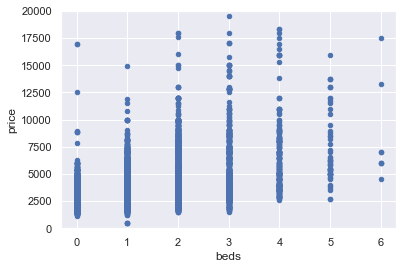

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()


# Import the data 
df_temp = pd.read_csv('df_temp.csv')


df_temp['beds'] = df_temp['beds'].fillna(0)

ax = df_temp.plot.scatter(x='beds',y='price');

ax.set_ylim(0,20000)




### Model

In [ ]:
basic = ["link", "address", "price", "sq_ft", "per_sq_ft",
         "rooms", "beds", "baths", "unit_type","neighborhood", "days_on_streeteasy", "realtor"]
amenities = ["bike room", "board approval required", "cats and dogs allowed", "central air conditioning",
            "concierge", "cold storage", "community recreation facilities", "children's playroom",
            "deck", "dishwasher", "doorman", "elevator", "full-time doorman", "furnished", "garage parking",
            "green building", "gym", "garden", "guarantors accepted", "laundry in building", "live-in super",
            "loft", "package room", "parking available", "patio", "pets allowed", "roof deck", "smoke-free",
            "storage available", "sublet", "terrace", "virtual doorman", "washer/dryer in-unit", "waterview",
            "waterfront"]
transport = ["A","C","E","B","D","F","M","G","L","J","Z",
             "N","Q","R","1","2","3","4","5","6","7","S",
             "LIRR","PATH"]

In [30]:
df_temp.columns

Index(['Unnamed: 0', 'link', 'address', 'price', 'sq_ft', 'per_sq_ft', 'rooms',
       'beds', 'baths', 'unit_type', 'neighborhood', 'days_on_streeteasy',
       'realtor', 'bike room', 'board approval required',
       'cats and dogs allowed', 'central air conditioning', 'concierge',
       'cold storage', 'community recreation facilities',
       'children's playroom', 'deck', 'dishwasher', 'doorman', 'elevator',
       'full-time doorman', 'furnished', 'garage parking', 'green building',
       'gym', 'garden', 'guarantors accepted', 'laundry in building',
       'live-in super', 'loft', 'package room', 'parking available', 'patio',
       'pets allowed', 'roof deck', 'smoke-free', 'storage available',
       'sublet', 'terrace', 'virtual doorman', 'washer/dryer in-unit',
       'waterview', 'waterfront', 'A', 'C', 'E', 'B', 'D', 'F', 'M', 'G', 'L',
       'J', 'Z', 'N', 'Q', 'R', '1', '2', '3', '4', '5', '6', '7', 'S', 'LIRR',
       'PATH'],
      dtype='object')

In [57]:
features_to_use = [
         "rooms", "beds", "baths","neighborhood","bike room", "board approval required", "cats and dogs allowed", "central air conditioning",
            "concierge", "cold storage", "community recreation facilities", "children's playroom",
            "deck", "dishwasher", "doorman", "elevator", "full-time doorman", "furnished", "garage parking",
            "green building", "gym", "garden", "guarantors accepted", "laundry in building", "live-in super",
            "package room", "parking available", "patio", "pets allowed", "roof deck", "smoke-free",
            "storage available", "sublet", "terrace", "virtual doorman", "washer/dryer in-unit", "waterview",
            "waterfront"]

X = df_temp[features_to_use].fillna(0)
y = df_temp['price']

In [132]:
len(X.neighborhood.unique())

191

In [22]:
X.head()

,rooms,beds,baths,neighborhood,bike room,board approval required,cats and dogs allowed,central air conditioning,concierge,cold storage,...,pets allowed,roof deck,smoke-free,storage available,sublet,terrace,virtual doorman,washer/dryer in-unit,waterview,waterfront
0,3.0,1.0,1.0,Sutton Place,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,2.0,Jersey City,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1.0,1.0,Murray Hill,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
3,3.0,1.0,1.0,Hunters Point,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
4,2.0,0.0,1.0,Midtown South,1,0,0,0,1,0,...,0,1,1,1,0,1,0,0,0,0


(0.0, 20000.0)

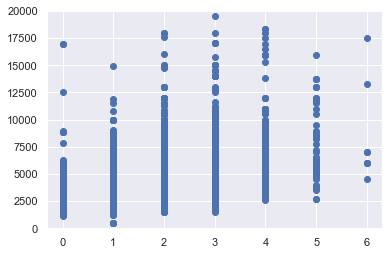

In [39]:
import matplotlib.pyplot as plt

x = df_temp.beds
y = df_temp.price
ax = plt.scatter(x,y)

plt.ylim([0,20000])


## Cross validation and random forest

In [141]:
# Spliting the data into random groups

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=20,random_state=42,shuffle=True)
accuracies = []

pred_list = []
targ_list = []

r_squared = []

for train_index, test_index in kf.split(X):

    data_train   = X.iloc[train_index]
    target_train = y.iloc[train_index]

    data_test    = X.iloc[test_index]
    target_test  = y.iloc[test_index]

    pipe = Pipeline([('data_frame',ohe_final),
                    ('randomForest',RandomForestRegressor(n_estimators = 400, 
                                                           random_state = 42, 
                                                           criterion = 'mse',
                                                           min_samples_leaf = 1,
                                                           min_samples_split= 2,
                                                           max_features = 'sqrt',
                                                           bootstrap=False,
                                                           max_depth = None))])

    # Fit the data
    pipe.fit(data_train, target_train)
        
    # Make some prediction
    predictions = pipe.predict(data_test)
    
    # Collect the prediction and the target data
    pred_list.append(predictions)
    targ_list.append(target_test)
    
    # Get the R-square
    rs = pipe.score(data_test,target_test)
    r_squared.append(rs)
    print('R-Squared:', round(rs, 2))
    mape = 100 * (errors / target_test)
    
    
    # Get the errors
    errors = abs(predictions - target_test)
    print('Mean Absolute Error:', round(np.median(errors), 2))
    mape = 100 * (errors / target_test)
    print('--')
    
    accuracy = 100 - np.median(mape)
    if accuracy > 0:
        accuracies.append(accuracy)
    
#     sum_res = sum((predictions - target_test)**2)
#     sum_tot = sum((target_test - np.mean(target_test))**2) 
#     accuracy = 1 - sum_res/sum_tot


    print('Accuracy:', round(accuracy, 2), '%.')

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)


R-Squared: -0.01
Mean Absolute Error: 268.29
--
Accuracy: 92.3 %.
R-Squared: 0.06
Mean Absolute Error: 276.0
--
Accuracy: 91.63 %.
R-Squared: 0.74
Mean Absolute Error: 191.79
--
Accuracy: 94.35 %.
R-Squared: -0.0
Mean Absolute Error: 223.92
--
Accuracy: 94.4 %.
R-Squared: 0.18
Mean Absolute Error: 260.94
--
Accuracy: 93.16 %.
R-Squared: -0.0
Mean Absolute Error: 202.16
--
Accuracy: 94.41 %.
R-Squared: -21.16
Mean Absolute Error: 291.67
--
Accuracy: 91.87 %.
R-Squared: -0.05
Mean Absolute Error: 272.4
--
Accuracy: 93.27 %.
R-Squared: -563.95
Mean Absolute Error: 313.18
--
Accuracy: 90.51 %.
R-Squared: -1.65
Mean Absolute Error: 231.38
--
Accuracy: 94.06 %.
R-Squared: 0.99
Mean Absolute Error: 239.77
--
Accuracy: 93.77 %.
R-Squared: -0.02
Mean Absolute Error: 183.71
--
Accuracy: 95.37 %.
R-Squared: -0.59
Mean Absolute Error: 215.58
--
Accuracy: 93.99 %.
R-Squared: 0.38
Mean Absolute Error: 201.0
--
Accuracy: 94.82 %.
R-Squared: 0.16
Mean Absolute Error: 218.75
--
Accuracy: 93.72 %.
R-Squ

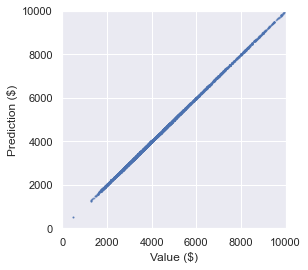

<Figure size 720x720 with 0 Axes>

In [136]:
# Flatten arrays
import itertools

merged_pred = list(itertools.chain(*pred_list))
merge_ind = list(itertools.chain(*targ_list))

fig, ax = plt.subplots() 
plt.scatter(merged_pred,merged_pred,s=1, alpha=0.5)
plt.xlim([0,10000])
plt.ylim([0,10000])
plt.xlabel('Value ($)')
plt.ylabel('Prediction ($)') 
plt.figure(figsize=(10,10))
fig.set_size_inches(4, 4, forward=True)

In [120]:
np.median(abs(pred_list[0] - targ_list[0]))

268.28812500000004

### Hyper parameters tunning

In [142]:
# Including the years in workforce information
# Random Forest
# Using RandomizedSearchCV to find best parameters faster

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 1000, num = 200)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(100, 1000, num = 200)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 1000, num = 200)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'regressor__max_features': max_features,
               'regressor__max_depth': max_depth,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf,
               'regressor__bootstrap': bootstrap}


pipe = Pipeline([('data_frame',ohe_final),
                    ('regressor',RandomForestRegressor(n_estimators = 500))])

gs_rForest = RandomizedSearchCV(pipe,
                        param_grid,
                        scoring = ['r2'],
                        refit = 'r2',
                        cv = 3,
                        verbose = 3,
                        n_iter = 100,)




gs_rForest.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END regressor__bootstrap=True, regressor__max_depth=452, regressor__max_features=sqrt, regressor__min_samples_leaf=392, regressor__min_samples_split=348; r2: (test=-0.000) total time=   0.6s
[CV 2/3] END regressor__bootstrap=True, regressor__max_depth=452, regressor__max_features=sqrt, regressor__min_samples_leaf=392, regressor__min_samples_split=348; r2: (test=0.000) total time=   0.5s
[CV 3/3] END regressor__bootstrap=True, regressor__max_depth=452, regressor__max_features=sqrt, regressor__min_samples_leaf=392, regressor__min_samples_split=348; r2: (test=-0.000) total time=   0.6s
[CV 1/3] END regressor__bootstrap=True, regressor__max_depth=968, regressor__max_features=sqrt, regressor__min_samples_leaf=593, regressor__min_samples_split=561; r2: (test=-0.000) total time=   0.5s
[CV 2/3] END regressor__bootstrap=True, regressor__max_depth=968, regressor__max_features=sqrt, regressor__min_samples_leaf=593, regressor

KeyboardInterrupt: 

In [98]:
gs_rForest.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
# Including the years in workforce information
# Random Forest
# Using RandomizedSearchCV to find best parameters faster

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 1000, num = 200)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(100, 1000, num = 200)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 1000, num = 200)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'regressor__max_features': max_features,
               'regressor__max_depth': max_depth,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf,
               'regressor__bootstrap': bootstrap}


pipe = Pipeline([('data_frame',ohe_final),
                    ('regressor',RandomForestRegressor(n_estimators = 500))])

gs_rForest = RandomizedSearchCV(pipe,
                        param_grid,
                        scoring = ['r2'],
                        refit = 'r2',
                        cv = 3,
                        verbose = 3,
                        n_iter = 100,)




gs_rForest.fit(X,y)

## Final Model

In [50]:
# This works!
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

# Column transformer
transformer_name = 'ohe_on_all_categorical_features'
transformer = OneHotEncoder(handle_unknown='ignore')
columns_to_encode = ['neighborhood']

ohe_final = ColumnTransformer([
    (transformer_name, transformer, columns_to_encode)], 
    remainder='passthrough')



random_grid = {'n_estimators': [100,150],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [int(x) for x in np.linspace(10, 1000, num = 10)]}



# pipe = Pipeline([('data_frame',ohe_final),
#                 ('randomForest',RandomForestRegressor(n_estimators=3000,
#                                                      random_state=42,
#                                                      criterion='mse',
#                                                      bootstrap=True))])


pipe = Pipeline([('data_frame',ohe_final),
                ('randomForest',RandomForestRegressor(n_estimators = 400, 
                                                       random_state = 42, 
                                                       criterion = 'mse',
                                                       min_samples_leaf = 1,
                                                       min_samples_split= 2,
                                                       max_features = 'sqrt',
                                                       bootstrap=False,
                                                       max_depth = None))])




pipe.fit(X,y)


Pipeline(steps=[('data_frame',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_on_all_categorical_features',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['neighborhood'])])),
                ('randomForest',
                 RandomForestRegressor(bootstrap=False, max_features='sqrt',
                                       n_estimators=400, random_state=42))])

In [51]:
pipe.score(X[:6400],y[:6400])

0.940162296183384

In [47]:
predictions = pipe.predict(X)

errors = abs(predictions - y)
accuracies = []

print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = 100 * (errors / y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)


Mean Absolute Error: 302.15
Accuracy: 94.02 %.
Average accuracy: 94.02195077740403


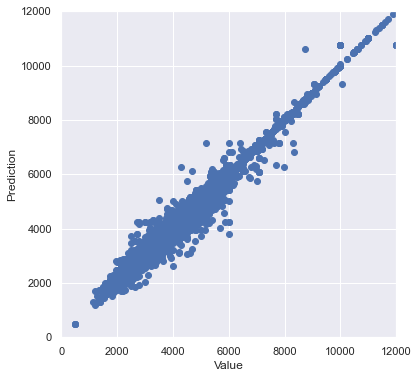

<Figure size 432x432 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

plt.scatter(y,pipe.predict(X))
plt.xlim([0,12000])
plt.ylim([0,12000])
plt.xlabel('Value')
plt.ylabel('Prediction') 
plt.figure(figsize=(6,6))
fig.set_size_inches(6, 6, forward=True)

In [67]:
pipe.score(X[:6400],y[:6400])

0.021499052468561652

In [99]:
predictions = pipe.predict(X[:6400])

errors = abs(predictions - y[:6400])
accuracies = []

print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = 100 * (errors / y[:6400])
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)



Mean Absolute Error: 351.32
Accuracy: 93.18 %.
Average accuracy: 93.18229179748155


In [100]:
# Save the model now

import pickle 
pickle.dump(pipe, open('pipe.pkl','wb'))

model = pickle.load(open('pipe.pkl','rb'))

In [96]:
model.score(X[:6400],y[:6400])

0.9401639380926672

In [123]:
factor_name_10[:20]


['rooms',
 'ohe_on_all_categorical_features__x0_Hudson Square',
 'beds',
 'ohe_on_all_categorical_features__x0_Elmhurst',
 'deck',
 'storage available',
 'parking available',
 'garage parking',
 'laundry in building',
 'doorman',
 'roof deck',
 'live-in super',
 'gym',
 'garden',
 'ohe_on_all_categorical_features__x0_Hunters Point',
 'ohe_on_all_categorical_features__x0_Bedford-Stuyvesant',
 'bike room',
 'ohe_on_all_categorical_features__x0_Lincoln Square',
 'baths',
 'terrace']

In [162]:

y = 30000
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

In [165]:
y

[0.1228500713403133,
 0.0937217023473122,
 0.08942145207023906,
 0.05286001127803875,
 0.04806148607148017,
 0.04333249694665951,
 0.04125725539967667,
 0.04004218189888868,
 0.03934669560738208,
 0.03516251538917565,
 0.03390948354055897,
 0.03318307227628968,
 0.032156134469276516,
 0.03085961353908686,
 0.026953031218120854,
 0.026255980409302944,
 0.025960930550704482,
 0.023454586961111107,
 0.022726739186656006,
 0.021561263369668633]

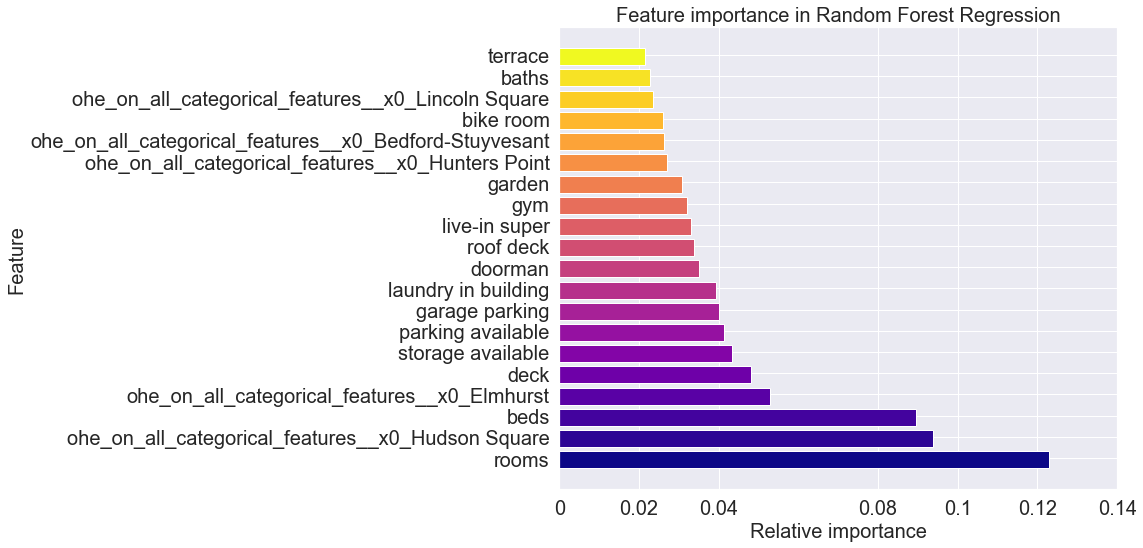

<Figure size 720x612 with 0 Axes>

In [200]:
factor_name = ohe_final.get_feature_names()
factor_importance = pipe['randomForest'].feature_importances_

indx = np.argsort(-factor_importance)

factor_name_10 = []
foctor_importance_10 = []

for el in indx:
    factor_name_10.append(factor_name[el])
    foctor_importance_10.append(factor_importance[el])
    
font = {
        'weight': 'normal',
        'size': 20,
        }
N = 20

import matplotlib.pyplot as plt
y = foctor_importance_10[:20]

x_ticks = [0, 0.02, 0.04, 0.08, 0.10, 0.12, 0.14]

# Color code
my_cmap = plt.get_cmap("plasma")
val = np.linspace(0,1,20)

fig, ax = plt.subplots() 
width = 0.8
ind = np.arange(len(y)) 
ax.barh(ind, y,width, color=my_cmap(val))
ax.set_yticks(ind+width/10)

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, fontsize=20)

ax.set_yticklabels(factor_name_10[:20], minor=False,fontdict= font)
plt.title('Feature importance in Random Forest Regression',fontdict=font)
plt.xlabel('Relative importance',fontdict=font)
plt.ylabel('Feature',fontdict=font) 
plt.figure(figsize=(10,8.5))
fig.set_size_inches(10, 8.5, forward=True)

In [196]:
np.linspace(0, 0.14,6).round()

array([0., 0., 0., 0., 0., 0.])

In [23]:
factor_name[[182, 49]]

TypeError: list indices must be integers or slices, not list

In [20]:
y = pipe['randomForest'].feature_importances_
list_y = [a for a in y if a > 0.005]
print(list_y)

list_of_index = []
for i in list_y:
    a = np.where(y==i)
    list_of_index.append(a)
print(list_of_index)

[0.03251674030702681, 0.007097178925754028, 0.08100928045288572, 0.020306173680789196, 0.013046478824354607, 0.020950898215031162, 0.008307121658309142, 0.013073219959528657, 0.01035084510044528, 0.011691170772083084, 0.008659912805955485, 0.07334332980094876, 0.05082154569475357, 0.022637988763506343, 0.020771239125567116, 0.019810415986491126, 0.01576283866303984, 0.013083433580591091, 0.03950937372806983, 0.018589961977053173, 0.012591941756461321, 0.03496313416647077, 0.031005861250067733, 0.03925476683201111, 0.048981673246196934, 0.031277934497940675, 0.09190466863537056, 0.0144967514266887, 0.030639848997963324, 0.028748540306606913, 0.007276633334481053, 0.040835065425696475, 0.02978733644610131, 0.016865880227811648]
[(array([8]),), (array([46]),), (array([49]),), (array([68]),), (array([75]),), (array([80]),), (array([86]),), (array([107]),), (array([108]),), (array([151]),), (array([172]),), (array([182]),), (array([183]),), (array([184]),), (array([185]),), (array([189]),),

In [24]:
list_index = [8,46,49,68,75,80,86,107,108,151,172,182,183,184,
              185,189,191,192,193,195,198,199,201,202,204,205,206,207,208,211,212,213,215,216]

In [25]:
features_to_use = pipe['data_frame'].get_feature_names()
col = []
for i in features_to_use:
    col.append(i)
labels = []
for i in list_index:
    b = col[i]
    labels.append(b)

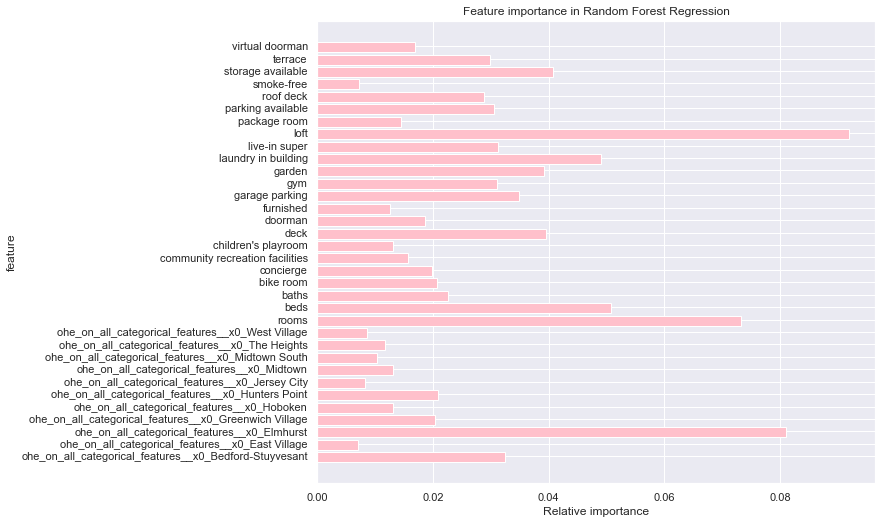

<Figure size 720x612 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
y = list_y
fig, ax = plt.subplots() 
width = 0.8
ind = np.arange(len(y)) 
ax.barh(ind, y,width, color="pink")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(labels, minor=False)
plt.title('Feature importance in Random Forest Regression')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(10,8.5))
fig.set_size_inches(10, 8.5, forward=True)

In [762]:
labels

['ohe_on_all_categorical_features__x0_Elmhurst',
 'ohe_on_all_categorical_features__x0_Greenwich Village',
 'ohe_on_all_categorical_features__x0_Hoboken',
 'ohe_on_all_categorical_features__x0_Jersey City',
 'ohe_on_all_categorical_features__x0_Midtown',
 'ohe_on_all_categorical_features__x0_Midtown South',
 'rooms',
 'beds',
 'baths',
 'bike room',
 'concierge',
 'community recreation facilities',
 "children's playroom",
 'deck',
 'doorman',
 'furnished',
 'garage parking',
 'gym',
 'garden',
 'laundry in building',
 'live-in super',
 'loft',
 'parking available',
 'roof deck',
 'storage available',
 'virtual doorman']

In [788]:
# Save the model now

import pickle 
pickle.dump(pipe, open('pipe.pkl','wb'))

model = pickle.load(open('pipe.pkl','rb'))



In [797]:
model.predict(X[:1])

array([3312.5])

In [102]:
factor_name_10[:20]

['ohe_on_all_categorical_features__x0_Hudson Square',
 'rooms',
 'beds',
 'ohe_on_all_categorical_features__x0_Elmhurst',
 'deck',
 'laundry in building',
 'garage parking',
 'storage available',
 'garden',
 'gym',
 'live-in super',
 'parking available',
 'roof deck',
 'ohe_on_all_categorical_features__x0_Bedford-Stuyvesant',
 'baths',
 'terrace',
 'ohe_on_all_categorical_features__x0_Hunters Point',
 'doorman',
 'bike room',
 'virtual doorman']

#### Some other examples

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor


# Column transformer
transformer_name = 'ohe_on_all_categorical_features'
transformer = OneHotEncoder()
columns_to_encode = ['neighborhood']

ohe_final = ColumnTransformer([
    (transformer_name, transformer, columns_to_encode)], 
    remainder='passthrough')

In [35]:
x_trans = ohe_final.fit_transform(X)
x_trans.shape

(5640, 219)

In [36]:
len(ohe_final.get_feature_names())

219

In [38]:
x_1 = x_trans.toarray()

x_pandas = pd.DataFrame(x_1,columns=ohe_final.get_feature_names())

x_pandas

,ohe_on_all_categorical_features__x0_Astoria,ohe_on_all_categorical_features__x0_Auburndale,ohe_on_all_categorical_features__x0_Bath Beach,ohe_on_all_categorical_features__x0_Battery Park City,ohe_on_all_categorical_features__x0_Bay Ridge,ohe_on_all_categorical_features__x0_Bayonne,ohe_on_all_categorical_features__x0_Bayside,ohe_on_all_categorical_features__x0_Bedford Park,ohe_on_all_categorical_features__x0_Bedford-Stuyvesant,ohe_on_all_categorical_features__x0_Belmont,...,pets allowed,roof deck,smoke-free,storage available,sublet,terrace,virtual doorman,washer/dryer in-unit,waterview,waterfront
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
x_pandas.columns

Index(['ohe_on_all_categorical_features__x0_Astoria',
       'ohe_on_all_categorical_features__x0_Auburndale',
       'ohe_on_all_categorical_features__x0_Bath Beach',
       'ohe_on_all_categorical_features__x0_Battery Park City',
       'ohe_on_all_categorical_features__x0_Bay Ridge',
       'ohe_on_all_categorical_features__x0_Bayonne',
       'ohe_on_all_categorical_features__x0_Bayside',
       'ohe_on_all_categorical_features__x0_Bedford Park',
       'ohe_on_all_categorical_features__x0_Bedford-Stuyvesant',
       'ohe_on_all_categorical_features__x0_Belmont',
       ...
       'pets allowed', 'roof deck', 'smoke-free', 'storage available',
       'sublet', 'terrace', 'virtual doorman', 'washer/dryer in-unit',
       'waterview', 'waterfront'],
      dtype='object', length=219)

In [42]:
y = df_temp['price']

model = RandomForestRegressor(n_estimators = 400, 
                                                       random_state = 42, 
                                                       criterion = 'mse',
                                                       min_samples_leaf = 1,
                                                       min_samples_split= 2,
                                                       max_features = 'sqrt',
                                                       bootstrap=False,
                                                       max_depth = None)
model.fit(x_pandas, y)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400,
                      random_state=42)

In [44]:
model.predict(x_pandas[:5])

array([3312.5       , 2600.        , 4717.83333333, 3647.        ,
       4781.        ])

In [ ]:
2

In [46]:
import shap

In [47]:
explainer = shap.TreeExplainer(model)

In [13]:
explainer

In [ ]:
shap_values = explainer.shap_values(x_pandas[:100])

In [ ]:
shap.summary_plot(shap_values, X)
st.pyplot(bbox_inches='tight')

# Using less features

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 20000.0)

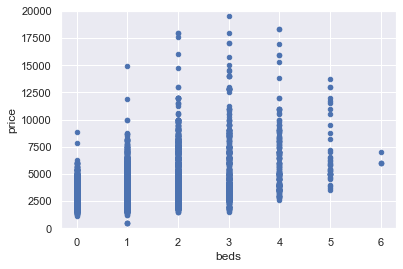

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()


# Import the data 
df_temp = pd.read_csv('df_temp.csv')


df_temp['beds'] = df_temp['beds'].fillna(0)

ax = df_temp.plot.scatter(x='beds',y='price');

ax.set_ylim(0,20000)


In [107]:
# Small version for the website

features_to_use = ["neighborhood",
         "rooms", "beds", "baths","bike room",
            "deck", "doorman",  "garage parking",
             "gym", "garden", "laundry in building", "live-in super",
             "parking available", "roof deck",
            "storage available", "terrace"]

X = df_temp[features_to_use].fillna(0)
y = df_temp['price']

In [108]:
X.shape

(7794, 16)

In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

# Column transformer
transformer_name = 'ohe_on_all_categorical_features'
transformer = OneHotEncoder(handle_unknown='ignore')
columns_to_encode = ['neighborhood']

ohe_final = ColumnTransformer([
    (transformer_name, transformer, columns_to_encode)], 
    remainder='passthrough')



random_grid = {'n_estimators': [100,150],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [int(x) for x in np.linspace(10, 1000, num = 10)]}



# pipe = Pipeline([('data_frame',ohe_final),
#                 ('randomForest',RandomForestRegressor(n_estimators=3000,
#                                                      random_state=42,
#                                                      criterion='mse',
#                                                      bootstrap=True))])


pipe = Pipeline([('data_frame',ohe_final),
                ('randomForest',RandomForestRegressor(n_estimators = 400, 
                                                       random_state = 42, 
                                                       criterion = 'mse',
                                                       min_samples_leaf = 1,
                                                       min_samples_split= 2,
                                                       max_features = 'sqrt',
                                                       bootstrap=False,
                                                       max_depth = None))])




pipe.fit(X,y)

Pipeline(steps=[('data_frame',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_on_all_categorical_features',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['neighborhood'])])),
                ('randomForest',
                 RandomForestRegressor(bootstrap=False, max_features='sqrt',
                                       n_estimators=400, random_state=42))])

In [110]:
pipe.predict(X[:10])

array([3312.5       , 2600.        , 4663.875     , 3647.        ,
       4804.33333333, 4343.5       , 2170.        , 3801.42857143,
       2240.        , 1718.75      ])

In [111]:
X.shape

(7794, 16)

In [28]:
len(features_to_use)

21

In [116]:
# Save the model now

import pickle 
pickle.dump(pipe, open('pipe_webapp.pkl','wb'))

model = pickle.load(open('pipe_webapp.pkl','rb'))

In [117]:
model.predict(X[:10])

array([3312.5       , 2600.        , 4663.875     , 3647.        ,
       4804.33333333, 4343.5       , 2170.        , 3801.42857143,
       2240.        , 1718.75      ])

## With Randomize grid search

In [666]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'randomForest__n_estimators': n_estimators,
               'randomForest__max_features': max_features,
               'randomForest__max_depth': max_depth,
               'randomForest__min_samples_split': min_samples_split,
               'randomForest__min_samples_leaf': min_samples_leaf,
               'randomForest__bootstrap': bootstrap}
print(random_grid)

{'randomForest__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'randomForest__max_features': ['auto', 'sqrt'], 'randomForest__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomForest__min_samples_split': [2, 5, 10], 'randomForest__min_samples_leaf': [1, 2, 4], 'randomForest__bootstrap': [True, False]}


In [667]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

# Column transformer
transformer_name = 'ohe_on_all_categorical_features'
transformer = OneHotEncoder()
columns_to_encode = ['neighborhood']

ohe_final = ColumnTransformer([
    (transformer_name, transformer, columns_to_encode)], 
    remainder='passthrough')


pipe = Pipeline([('data_frame',ohe_final),
                ('randomForest',RandomForestRegressor())])
                
                
                
model_final = RandomizedSearchCV(pipe, random_grid, cv=3, n_jobs=2, verbose=3, random_state=0, n_iter=20)


model_final.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

[CV 2/3] END randomForest__bootstrap=False, randomForest__max_depth=40, randomForest__max_features=auto, randomForest__min_samples_leaf=2, randomForest__min_samples_split=2, randomForest__n_estimators=600;, score=nan total time=  13.7s
[CV 3/3] END randomForest__bootstrap=False, randomForest__max_depth=40, randomForest__max_features=auto, randomForest__min_samples_leaf=2, randomForest__min_samples_split=2, randomForest__n_estimators=600;, score=nan total time=  14.1s
[CV 2/3] END randomForest__bootstrap=False, randomForest__max_depth=30, randomForest__max_features=auto, randomForest__min_samples_leaf=4, randomForest__min_samples_split=10, randomForest__n_estimators=1600;, score=nan total time=  25.7s
[CV 1/3] END randomForest__bootstrap=True, randomForest__max_depth=100, randomForest__max_features=auto, randomForest__min_samples_leaf=2, randomForest__min_samples_split=2, randomForest__n_estimators=800;, score=nan total time=  14.9s
[CV 3/3] END randomForest__bootstrap=True, randomFores

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

[CV 1/3] END randomForest__bootstrap=False, randomForest__max_depth=40, randomForest__max_features=auto, randomForest__min_samples_leaf=2, randomForest__min_samples_split=2, randomForest__n_estimators=600;, score=nan total time=  14.2s
[CV 1/3] END randomForest__bootstrap=False, randomForest__max_depth=30, randomForest__max_features=auto, randomForest__min_samples_leaf=4, randomForest__min_samples_split=10, randomForest__n_estimators=1600;, score=nan total time=  26.3s
[CV 3/3] END randomForest__bootstrap=False, randomForest__max_depth=30, randomForest__max_features=auto, randomForest__min_samples_leaf=4, randomForest__min_samples_split=10, randomForest__n_estimators=1600;, score=nan total time=  25.5s
[CV 2/3] END randomForest__bootstrap=True, randomForest__max_depth=100, randomForest__max_features=auto, randomForest__min_samples_leaf=2, randomForest__min_samples_split=2, randomForest__n_estimators=800;, score=nan total time=  14.8s
[CV 1/3] END randomForest__bootstrap=False, randomFo

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/Users/ftejera/opt/anaconda3/lib/python3.9/site-packages/sklearn/comp

KeyboardInterrupt: 

In [668]:
model_final.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [683]:
predictions = pipe.predict(X)

errors = abs(predictions - y)
accuracies = []

print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = 100 * (errors / y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)


ValueError: operands could not be broadcast together with shapes (3769,) (207,) 